In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("sm_ph_temp_14.csv")

In [3]:
df.columns = ['sensor_id', 'TS_RECV', 'sm_ph_mac_id', 'sm_ph_ts', 'battery_temperature', 'cpu_temperature', 'ram_usage_percent', 'adt_sensor_id', 'actual_temperature', 'bms', 'chg_therm','xo_therm', 'xo_therm_buf', 'msm_therm', 'chg_temp', 'pm_8953_tz', 'pa_therm_0', 'front_temp', 'back_temp', 'battery_temp', 'battery_percentage', 'battery_voltage', 'is_charging', 'is_turbo_charging']

In [25]:
df.shape

(26067, 24)

In [26]:
df.loc[df['actual_temperature'] < 15, 'actual_temperature'] = None

In [27]:
df.dropna(subset=['actual_temperature'], inplace=True)
df.describe()

,TS_RECV,sm_ph_ts,battery_temperature,cpu_temperature,ram_usage_percent,adt_sensor_id,actual_temperature,bms,chg_therm,xo_therm,xo_therm_buf,msm_therm,chg_temp,pm_8953_tz,pa_therm_0,front_temp,back_temp,battery_temp,battery_percentage,battery_voltage,is_charging,is_turbo_charging
count,2.606700e+04,2.606700e+04,26067.000000,26067.0,26067.000000,26067.000000,26067.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.000000,18970.0
mean,1.527099e+09,1.527099e+09,31.673729,0.0,47.263322,3.193693,27.368193,38.518413,38.519541,38.908540,23.646953,24.793571,14.957682,23.531281,8.939178,0.357032,1.129373,0.382826,67.889826,4.034636,0.357775,0.0
std,4.681218e+05,4.681158e+05,2.596337,0.0,29.824730,1.599258,1.802666,7.004096,6.723487,6.946867,19.238077,18.901881,19.590566,37.220518,14.034288,3.253150,6.157887,3.487606,21.971823,0.191910,0.479358,0.0
min,1.526379e+09,1.526379e+09,26.200000,0.0,0.000000,1.000000,23.476000,27.500000,28.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.624000,0.000000,0.0
25%,1.526557e+09,1.526557e+09,30.000000,0.0,0.000000,2.000000,26.415500,33.000000,33.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,3.901000,0.000000,0.0
50%,1.527144e+09,1.527144e+09,31.200000,0.0,60.974742,3.000000,27.063000,38.000000,37.000000,38.000000,32.000000,35.000000,0.335000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,4.014000,0.000000,0.0
75%,1.527495e+09,1.527495e+09,32.900000,0.0,68.063660,5.000000,27.859000,41.000000,43.000000,44.000000,37.000000,38.000000,36.893002,79.000000,28.700001,0.000000,0.000000,0.000000,83.000000,4.152000,1.000000,0.0
max,1.528098e+09,1.528098e+09,41.000000,0.0,87.374005,7.000000,33.336000,68.000000,64.000000,63.000000,100.000000,69.000000,57.327999,88.000000,37.700001,31.881001,41.000000,33.700001,100.000000,4.413000,1.000000,0.0


In [28]:
y = df['actual_temperature']

In [29]:
X = df['battery_temperature']
print(X.corr(y))
X = X.values.reshape(-1, 1)
X
df['sm_ph_mac_id'].value_counts()

0.4774558373549558


f4:f5:db:94:93:df    7774
54:b8:2:14:56:eb     6685
2c:4d:54:3f:31:d6    6014
d4:63:c6:26:72:2a    3394
78:2:f8:93:f:85      1425
80:ad:16:c9:da:32     397
48:88:ca:be:cb:ee     378
Name: sm_ph_mac_id, dtype: int64

In [22]:
df_mac_a = df[df['sm_ph_mac_id'] == '2c:4d:54:3f:31:d6']
df_mac_b = df[df['sm_ph_mac_id'] == '48:88:ca:be:cb:ee']
df_mac_c = df[df['sm_ph_mac_id'] == 'd4:63:c6:26:72:2a']
df_mac_d = df[df['sm_ph_mac_id'] == 'f4:f5:db:94:93:df']
df_mac_e = df[df['sm_ph_mac_id'] == '54:b8:2:14:56:eb']

In [23]:
X_a = df_mac_a['battery_temperature'].values.reshape(-1, 1)
X_b = df_mac_b['battery_temperature'].values.reshape(-1, 1)
X_c = df_mac_c['battery_temperature'].values.reshape(-1, 1)
X_d = df_mac_d['battery_temperature'].values.reshape(-1, 1)
X_e = df_mac_e['battery_temperature'].values.reshape(-1, 1)

X_a_c = np.append(df_mac_a['battery_temperature'].values, df_mac_c['battery_temperature'].values).reshape(-1, 1)


y_a = df_mac_a['actual_temperature'].values
y_b = df_mac_b['actual_temperature'].values
y_c = df_mac_c['actual_temperature'].values
y_d = df_mac_d['actual_temperature'].values
y_e = df_mac_e['actual_temperature'].values

y_a_c = np.append(df_mac_a['actual_temperature'].values, df_mac_c['actual_temperature'].values)

print(y_a.shape, y_b.shape, y_c.shape, y_d.shape, y_e.shape, X_a_c.shape)


(6014,) (378,) (3394,) (7774,) (6685,) (9408, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from time import time


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
def runmodel(X, y, algo = "mlp", epochs=8, n_input=1, isPlot=True, isPoly=True):
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error   
    import matplotlib.pyplot as plt
    
    mae = {}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    mmx = StandardScaler()  
    mmy = StandardScaler()  
    if(n_input == 1):
        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)

    X_train_scaled = mmx.fit_transform(X_train)
    print(X_train_scaled.shape)
    y_train_scaled = mmy.fit_transform(y_train.reshape(-1, 1))
    
    X_test_scaled = mmx.transform(X_test)
    
    if (algo == "mlp"):
        model = runNN(X_train_scaled, y_train_scaled, epochs, n_input)
    elif (algo == "linreg"):
        model = regress(X_train_scaled, y_train_scaled)
    elif (algo == "ranfor"):
        model = randomforest(X_train_scaled, y_train_scaled)
    elif (algo == "svr"):
        models = svr(X_train_scaled, y_train_scaled)
        for model in models:
            if(isPlot):
                getpredplot(model, X_train_scaled, y_train_scaled)
            mae[algo] = getRMSE(model, X_test_scaled, y_test, mmy)   
        return mae
    elif (algo == "all"):
        for fn in [regress, runNN, randomforest, svr, knn, ridge, ransac]:
            print("=================", fn.__name__ , "=================")
            if(fn == runNN):
                model = fn(X_train_scaled, y_train_scaled, epochs, n_input)
            else:
                model = fn(X_train_scaled, y_train_scaled)
            if(fn == svr):
                i = 0
                for modeli in model:
                    i = i + 1
                    if(isPlot):
                        getpredplot(modeli, X_train_scaled, y_train_scaled)
                    mae[fn.__name__ + str(i)] = getRMSE(modeli, X_test_scaled, y_test, mmy)
            else:
                if(isPlot):
                    getpredplot(model, X_train_scaled, y_train_scaled)
                mae[fn.__name__] = getRMSE(model, X_test_scaled, y_test, mmy)             
        return mae
    else:
        print("No such model")
        return
    if(isPlot):
        getpredplot(model, X_train_scaled, y_train_scaled)
    mae[algo] = getRMSE(model, X_test_scaled, y_test, mmy)  
    return mae
        

In [11]:
def knn(X, y):
    from sklearn.neighbors import KNeighborsRegressor
    neigh = KNeighborsRegressor(n_neighbors=200)
    neigh.fit(X, y)
    return neigh

In [12]:
def ridge(X, y):
    from sklearn.linear_model import Ridge
    rr = Ridge()
    rr.fit(X, y)
    return rr

In [13]:
def ransac(X, y):
    from sklearn.linear_model import RANSACRegressor
    ransac = RANSACRegressor()
    ransac.fit(X, y)
    return ransac

In [70]:
def getpredplot(model, X, y):
    y_pred = model.predict(np.arange(-3, 3, 0.01).reshape(-1, 1))
    plt.scatter(X, y, s=0.5)
    plt.plot(np.arange(-3, 3, 0.01), y_pred, color='red')
    plt.show()

In [15]:
def getRMSE(model, X, y, mmy):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    y_pred_scaled = model.predict(X).reshape(-1, 1)
    y_pred = mmy.inverse_transform(y_pred_scaled)
    #print("RMSE :", np.sqrt(mean_squared_error(y_pred, y)))
    mae = mean_absolute_error(y_pred, y)
    print("MAE :", mean_absolute_error(y_pred, y))
    return mae

In [16]:
def randomforest(X, y):    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.datasets import make_regression

    regr = RandomForestRegressor(max_depth=3, random_state=0)
    t0 = time()
    regr.fit(X, y)
    t1 = time()
    print("rf time", t1 - t0)
    
    #print(regr.feature_importances_)
    return regr


In [17]:
def regress(X, y, plot=True):
    print("================SKLEARN==============")
    
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    
    lr = LinearRegression()
    t0 = time()
    lr.fit(X, y)
    t1 = time()
    print("lr time", t1 - t0)
    
   # print("R2 = " , lr.score(X, y))
   # print('Coefficient: \n', lr.coef_)
    #print('Intercept: \n', lr.intercept_)
    
   # y_pred = lr.predict(X)
  #  print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
  #  print('Variance score: %.2f' % r2_score(y, y_pred))
     #if plot:
      #  import matplotlib.pyplot as plt
       # plt.scatter(X, y, s=2)
        #plt.plot(X, y_pred, color='red')
        #plt.show()'''
        
    print("================STATSMODELS==============")
    import statsmodels.api as sm
    X = sm.add_constant(X)
    model = sm.OLS(y,X)
    result = model.fit()
   # print(result.summary())
    
    return lr

In [18]:
def runNN(X, y, epochs, n_input=1):    
    model = Sequential()
    model.add(Dense(8, input_dim=n_input, activation='relu'))
    #model.add(Dense(4, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')
   # print(model.summary())
    t0 = time()
    history = model.fit(X, y, epochs=epochs, verbose=1, batch_size=16, validation_split=0.2)
    t1 = time()
   # plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
   # plt.title('model loss')
   #plt.ylabel('loss')
    #plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    #plt.show()
    print("nn time", t1 - t0)
    return model
    
    

In [19]:
def svr(X, y):
    from sklearn.svm import SVR
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    t0 = time()
    svr_rbf.fit(X, y)
    t1 = time()
    print("rbf", t1 - t0)
    #svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    #t0 = time()
    #svr_poly.fit(X, y)
    #t1 = time()
    #print("poly", t1 - t0)
    svr_poly = 0
    
    
    return [svr_rbf]
    

(4811, 1)
================= regress =================
================SKLEARN==============
lr time 0.09156990051269531
================STATSMODELS==============


/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


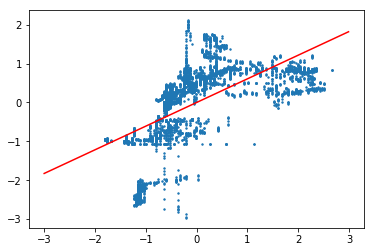

MAE : 0.6011813261796717
================= runNN =================
Train on 3848 samples, validate on 963 samples
Epoch 1/8
3848/3848 [==============================] - 1s 362us/step - loss: 0.5686 - val_loss: 0.4328
Epoch 2/8
3848/3848 [==============================] - 0s 112us/step - loss: 0.4129 - val_loss: 0.4006
Epoch 3/8
3848/3848 [==============================] - 1s 152us/step - loss: 0.3944 - val_loss: 0.3990
Epoch 4/8
3848/3848 [==============================] - 1s 134us/step - loss: 0.3883 - val_loss: 0.3929
Epoch 5/8
3848/3848 [==============================] - 0s 113us/step - loss: 0.3838 - val_loss: 0.3881
Epoch 6/8
3848/3848 [==============================] - 0s 125us/step - loss: 0.3826 - val_loss: 0.3880
Epoch 7/8
3848/3848 [==============================] - 0s 122us/step - loss: 0.3796 - val_loss: 0.3881
Epoch 8/8
3848/3848 [==============================] - 0s 112us/step - loss: 0.3780 - val_loss: 0.3823
nn time 4.9832985401153564


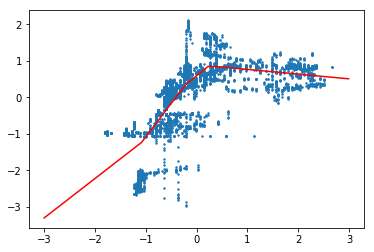

MAE : 0.43513239962481903
================= randomforest =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


rf time 0.05640387535095215


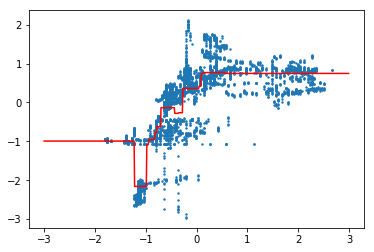

MAE : 0.3425441429325248
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 6.44943642616272


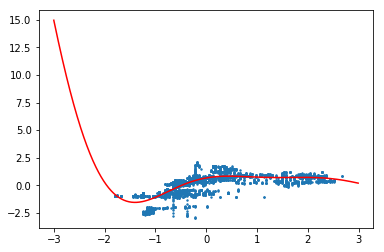

MAE : 0.4103250061667908
================= knn =================


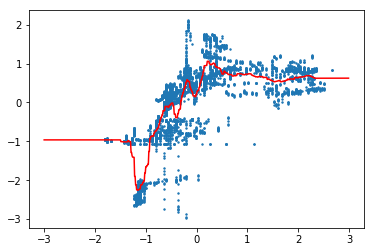

MAE : 0.34034917290108063
================= ridge =================


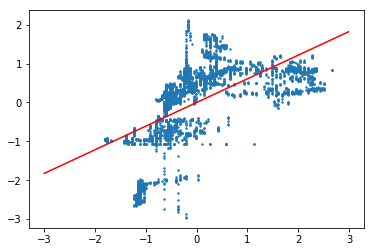

MAE : 0.6011613301329638
================= ransac =================


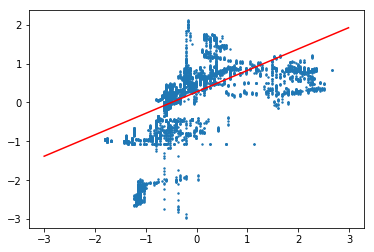

MAE : 0.6157859163018596


In [24]:
import matplotlib.pyplot as plt
mae_a = runmodel(X_a, y_a, "all")

(20853, 1)
================= regress =================
================SKLEARN==============
lr time 0.0014750957489013672
================STATSMODELS==============


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


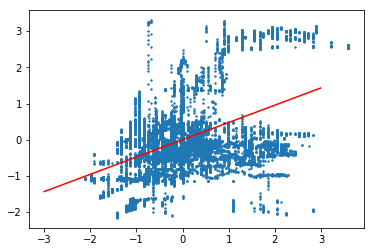

MAE : 1.1923471708470152
================= runNN =================
Train on 16682 samples, validate on 4171 samples
Epoch 1/70
16682/16682 [==============================] - 2s 133us/step - loss: 0.8093 - val_loss: 0.7546
Epoch 2/70
16682/16682 [==============================] - 2s 129us/step - loss: 0.7794 - val_loss: 0.7409
Epoch 3/70
16682/16682 [==============================] - 2s 135us/step - loss: 0.7767 - val_loss: 0.7391
Epoch 4/70
16682/16682 [==============================] - 2s 142us/step - loss: 0.7755 - val_loss: 0.7496
Epoch 5/70
16682/16682 [==============================] - 3s 156us/step - loss: 0.7762 - val_loss: 0.7404
Epoch 6/70
16682/16682 [==============================] - 2s 125us/step - loss: 0.7751 - val_loss: 0.7403
Epoch 7/70
16682/16682 [==============================] - 2s 122us/step - loss: 0.7747 - val_loss: 0.7385
Epoch 8/70
16682/16682 [==============================] - 2s 108us/step - loss: 0.7738 - val_loss: 0.7383
Epoch 9/70
16682/16682 [============

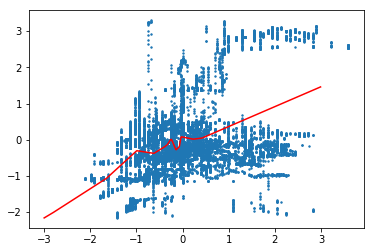

MAE : 1.1547630090570833
================= randomforest =================
rf time 0.034613609313964844


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


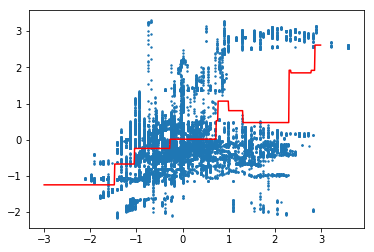

MAE : 1.1169108732212367
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 92.52387690544128


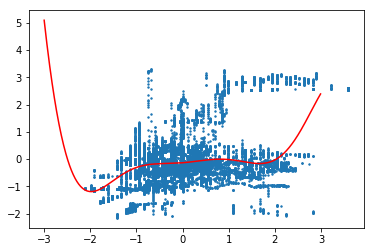

MAE : 1.0789167817101615
================= knn =================


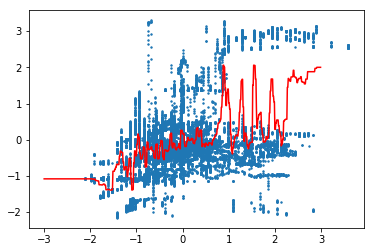

MAE : 0.9697915794016111
================= ridge =================


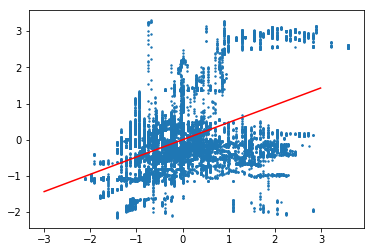

MAE : 1.1923433880701098
================= ransac =================


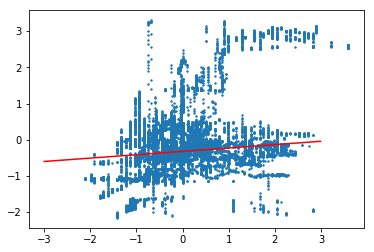

MAE : 1.1603610224748675
(4811, 1)
================= regress =================
================SKLEARN==============
lr time 0.0008144378662109375
================STATSMODELS==============


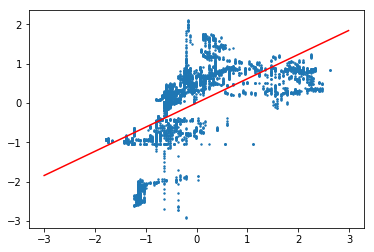

MAE : 0.5876730897234107
================= runNN =================
Train on 3848 samples, validate on 963 samples
Epoch 1/8
3848/3848 [==============================] - 0s 110us/step - loss: 0.8483 - val_loss: 0.7419
Epoch 2/8
3848/3848 [==============================] - 0s 67us/step - loss: 0.5427 - val_loss: 0.4205
Epoch 3/8
3848/3848 [==============================] - 0s 68us/step - loss: 0.3605 - val_loss: 0.3562
Epoch 4/8
3848/3848 [==============================] - 1s 140us/step - loss: 0.3461 - val_loss: 0.3519
Epoch 5/8
3848/3848 [==============================] - 0s 69us/step - loss: 0.3427 - val_loss: 0.3485
Epoch 6/8
3848/3848 [==============================] - 0s 67us/step - loss: 0.3385 - val_loss: 0.3482
Epoch 7/8
3848/3848 [==============================] - 0s 68us/step - loss: 0.3360 - val_loss: 0.3460
Epoch 8/8
3848/3848 [==============================] - 0s 68us/step - loss: 0.3348 - val_loss: 0.3415
nn time 2.737143039703369


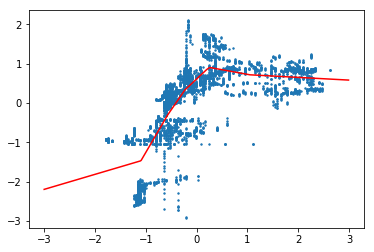

MAE : 0.4284421084587115
================= randomforest =================
rf time 0.025098562240600586


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


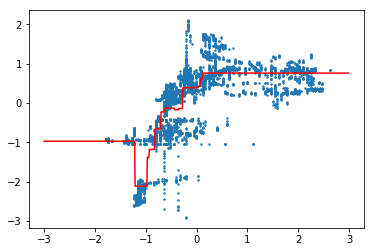

MAE : 0.35192072878062486
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 8.111664772033691


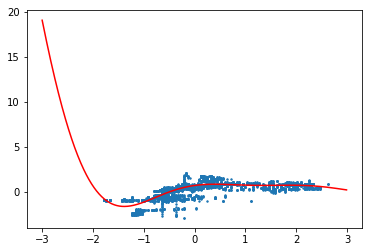

MAE : 0.4143609587899466
================= knn =================


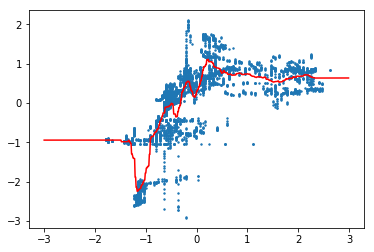

MAE : 0.352006616791355
================= ridge =================


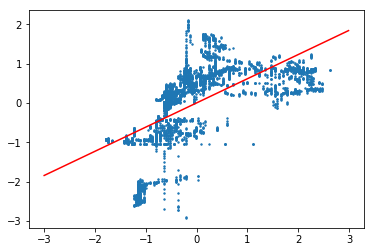

MAE : 0.587653767834707
================= ransac =================


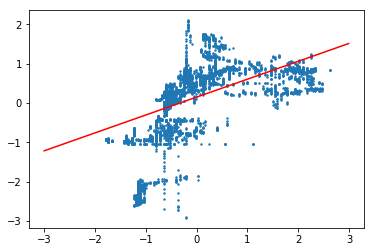

MAE : 0.5719975446156477
(302, 1)
================= regress =================
================SKLEARN==============
lr time 0.00044035911560058594
================STATSMODELS==============


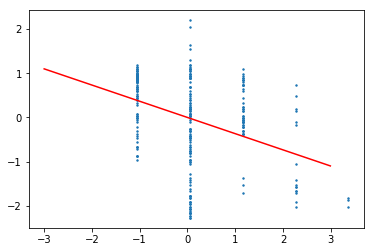

MAE : 0.1161908862684085
================= runNN =================
Train on 241 samples, validate on 61 samples
Epoch 1/12
241/241 [==============================] - 0s 956us/step - loss: 1.8355 - val_loss: 1.5706
Epoch 2/12
241/241 [==============================] - 0s 314us/step - loss: 1.6437 - val_loss: 1.4333
Epoch 3/12
241/241 [==============================] - 0s 359us/step - loss: 1.5022 - val_loss: 1.3183
Epoch 4/12
241/241 [==============================] - 0s 250us/step - loss: 1.3959 - val_loss: 1.2397
Epoch 5/12
241/241 [==============================] - 0s 265us/step - loss: 1.3164 - val_loss: 1.1771
Epoch 6/12
241/241 [==============================] - 0s 246us/step - loss: 1.2522 - val_loss: 1.1233
Epoch 7/12
241/241 [==============================] - 0s 234us/step - loss: 1.1976 - val_loss: 1.0843
Epoch 8/12
241/241 [==============================] - 0s 215us/step - loss: 1.1543 - val_loss: 1.0459
Epoch 9/12
241/241 [==============================] - 0s 95us/step - los

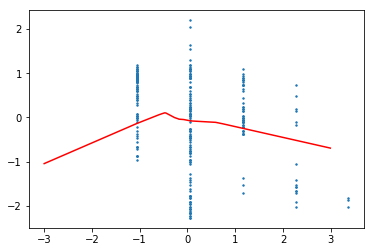

MAE : 0.12853462138928834
================= randomforest =================
rf time 0.0150909423828125


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


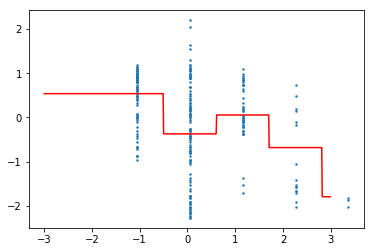

MAE : 0.11770726468272981
================= svr =================
rbf 0.014301538467407227


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


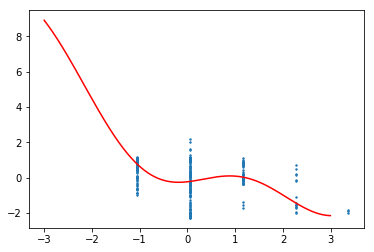

MAE : 0.11093487425560856
================= knn =================


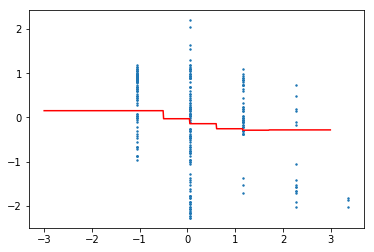

MAE : 0.12293309210526304
================= ridge =================


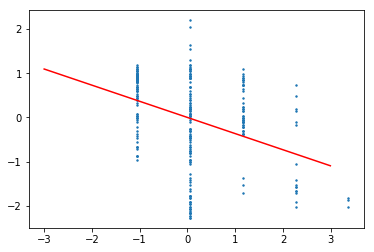

MAE : 0.11620272770911484
================= ransac =================


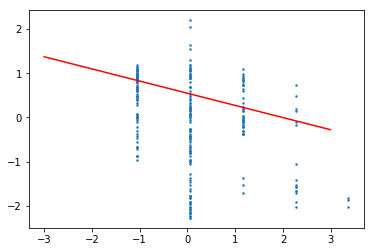

MAE : 0.11417290567780333
(2715, 1)
================= regress =================
================SKLEARN==============
lr time 0.0006597042083740234
================STATSMODELS==============


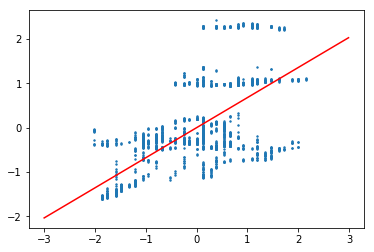

MAE : 0.8028499972429242
================= runNN =================
Train on 2172 samples, validate on 543 samples
Epoch 1/8
2172/2172 [==============================] - 0s 167us/step - loss: 0.7105 - val_loss: 0.5799
Epoch 2/8
2172/2172 [==============================] - 0s 70us/step - loss: 0.6278 - val_loss: 0.5276
Epoch 3/8
2172/2172 [==============================] - 0s 67us/step - loss: 0.5847 - val_loss: 0.5141
Epoch 4/8
2172/2172 [==============================] - 0s 68us/step - loss: 0.5724 - val_loss: 0.5069
Epoch 5/8
2172/2172 [==============================] - 0s 72us/step - loss: 0.5625 - val_loss: 0.4963
Epoch 6/8
2172/2172 [==============================] - 0s 71us/step - loss: 0.5548 - val_loss: 0.4913
Epoch 7/8
2172/2172 [==============================] - 0s 69us/step - loss: 0.5488 - val_loss: 0.4818
Epoch 8/8
2172/2172 [==============================] - 0s 71us/step - loss: 0.5453 - val_loss: 0.4775
nn time 1.7376978397369385


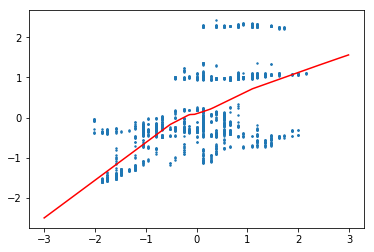

MAE : 0.7967250930943438
================= randomforest =================
rf time 0.01305389404296875


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


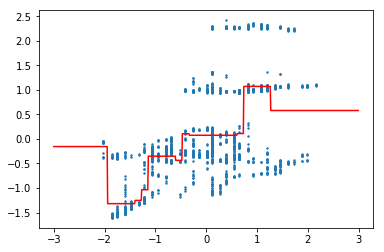

MAE : 0.6680644538179032
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 3.9873106479644775


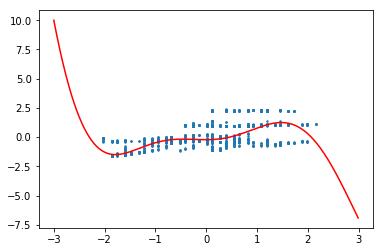

MAE : 0.6832118887999704
================= knn =================


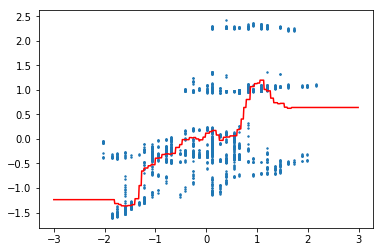

MAE : 0.6817749042709866
================= ridge =================


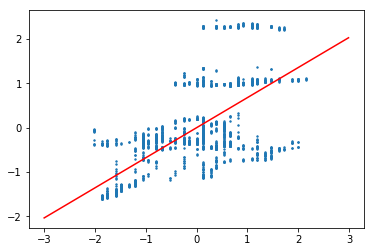

MAE : 0.8028916733865693
================= ransac =================


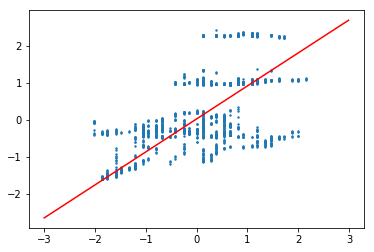

MAE : 0.7941885541675681
(6219, 1)
================= regress =================
================SKLEARN==============
lr time 0.0008084774017333984
================STATSMODELS==============


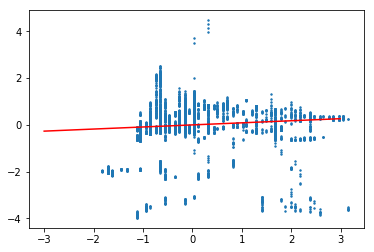

MAE : 0.668661628281219
================= runNN =================
Train on 4975 samples, validate on 1244 samples
Epoch 1/8
4975/4975 [==============================] - 1s 117us/step - loss: 0.9210 - val_loss: 0.9048
Epoch 2/8
4975/4975 [==============================] - 0s 71us/step - loss: 0.8228 - val_loss: 0.8588
Epoch 3/8
4975/4975 [==============================] - 0s 72us/step - loss: 0.8030 - val_loss: 0.8536
Epoch 4/8
4975/4975 [==============================] - 0s 72us/step - loss: 0.7966 - val_loss: 0.8471
Epoch 5/8
4975/4975 [==============================] - 0s 69us/step - loss: 0.7927 - val_loss: 0.8438
Epoch 6/8
4975/4975 [==============================] - 0s 71us/step - loss: 0.7874 - val_loss: 0.8408
Epoch 7/8
4975/4975 [==============================] - 0s 70us/step - loss: 0.7819 - val_loss: 0.8302
Epoch 8/8
4975/4975 [==============================] - 1s 136us/step - loss: 0.7686 - val_loss: 0.8171
nn time 3.5762526988983154


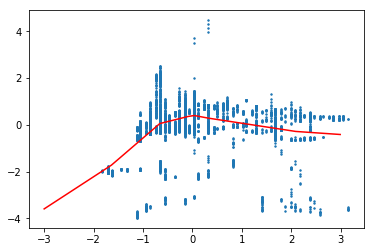

MAE : 0.5839245341506417
================= randomforest =================
rf time 0.02328801155090332


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


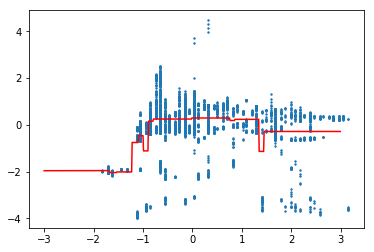

MAE : 0.5710575204507562
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 10.828310012817383


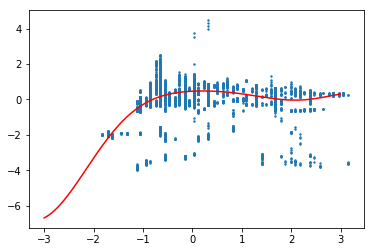

MAE : 0.5532466138118176
================= knn =================


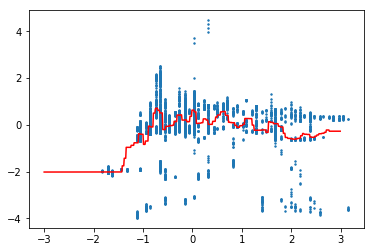

MAE : 0.5458025659163988
================= ridge =================


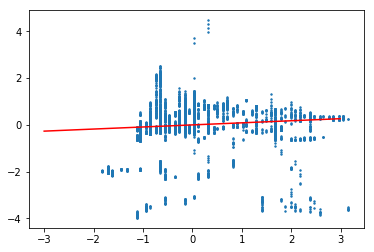

MAE : 0.6686626476557118
================= ransac =================


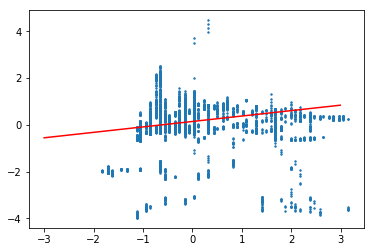

MAE : 0.6777212267504231
(5348, 1)
================= regress =================
================SKLEARN==============
lr time 0.0008263587951660156
================STATSMODELS==============


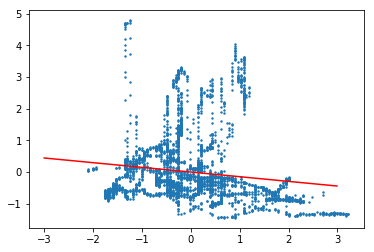

MAE : 0.8844451405673449
================= runNN =================
Train on 4278 samples, validate on 1070 samples
Epoch 1/8
4278/4278 [==============================] - 1s 130us/step - loss: 0.9690 - val_loss: 0.8479
Epoch 2/8
4278/4278 [==============================] - 0s 73us/step - loss: 0.9414 - val_loss: 0.8356
Epoch 3/8
4278/4278 [==============================] - 0s 70us/step - loss: 0.9285 - val_loss: 0.8241
Epoch 4/8
4278/4278 [==============================] - 0s 70us/step - loss: 0.9187 - val_loss: 0.8163
Epoch 5/8
4278/4278 [==============================] - 0s 72us/step - loss: 0.9104 - val_loss: 0.8146
Epoch 6/8
4278/4278 [==============================] - 1s 156us/step - loss: 0.9034 - val_loss: 0.8135
Epoch 7/8
4278/4278 [==============================] - 0s 80us/step - loss: 0.8983 - val_loss: 0.8105
Epoch 8/8
4278/4278 [==============================] - 0s 88us/step - loss: 0.8942 - val_loss: 0.8106
nn time 3.366542100906372


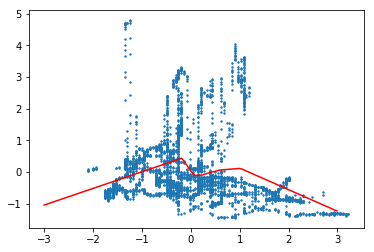

MAE : 0.8538770586012369
================= randomforest =================
rf time 0.01966404914855957


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


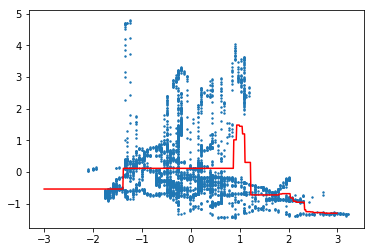

MAE : 0.8065594968998028
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 8.474762439727783


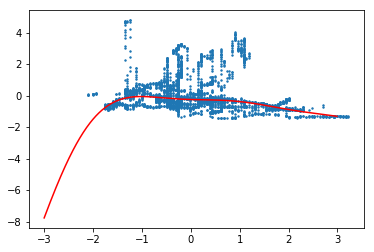

MAE : 0.7682076724590721
================= knn =================


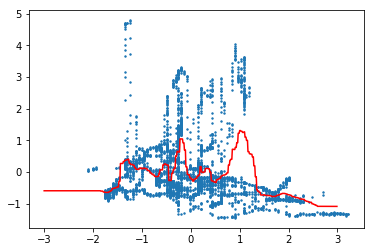

MAE : 0.7540573335826477
================= ridge =================


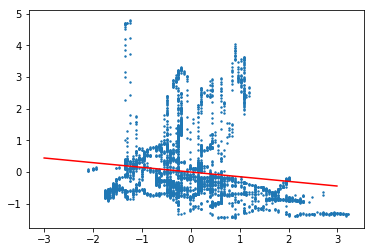

MAE : 0.8844476027937341
================= ransac =================


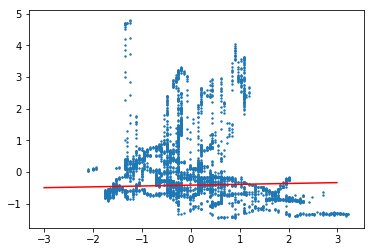

MAE : 0.8658886147039241
{'svr1': 1.0789167817101615, 'runNN': 1.1547630090570833, 'randomforest': 1.1169108732212367, 'ridge': 1.1923433880701098, 'knn': 0.9697915794016111, 'regress': 1.1923471708470152, 'ransac': 1.1603610224748675} {'svr1': 0.4143609587899466, 'runNN': 0.4284421084587115, 'randomforest': 0.35192072878062486, 'ridge': 0.587653767834707, 'knn': 0.352006616791355, 'regress': 0.5876730897234107, 'ransac': 0.5719975446156477} {'svr1': 0.11093487425560856, 'runNN': 0.12853462138928834, 'randomforest': 0.11770726468272981, 'ridge': 0.11620272770911484, 'knn': 0.12293309210526304, 'regress': 0.1161908862684085, 'ransac': 0.11417290567780333} {'svr1': 0.6832118887999704, 'runNN': 0.7967250930943438, 'randomforest': 0.6680644538179032, 'ridge': 0.8028916733865693, 'knn': 0.6817749042709866, 'regress': 0.8028499972429242, 'ransac': 0.7941885541675681} {'svr1': 0.5532466138118176, 'runNN': 0.5839245341506417, 'randomforest': 0.5710575204507562, 'ridge': 0.6686626476557118, 'kn

In [30]:
#runmodel(X_a, y_a, "all", epochs=12)
#runmodel(X_b, y_b, "all")
#runmodel(X_c, y_c, "all")
import random
import matplotlib.pyplot as plt
random.seed(7)
mae = runmodel(X, y, "all", epochs=70, isPoly=False)
mae_a = runmodel(X_a, y_a, "all")
mae_b = runmodel(X_b, y_b, "all", epochs=12)
mae_c = runmodel(X_c, y_c, "all")
mae_d = runmodel(X_d, y_d, "all")
mae_e = runmodel(X_e, y_e, "all")
print(mae, mae_a, mae_b, mae_c, mae_d, mae_e)

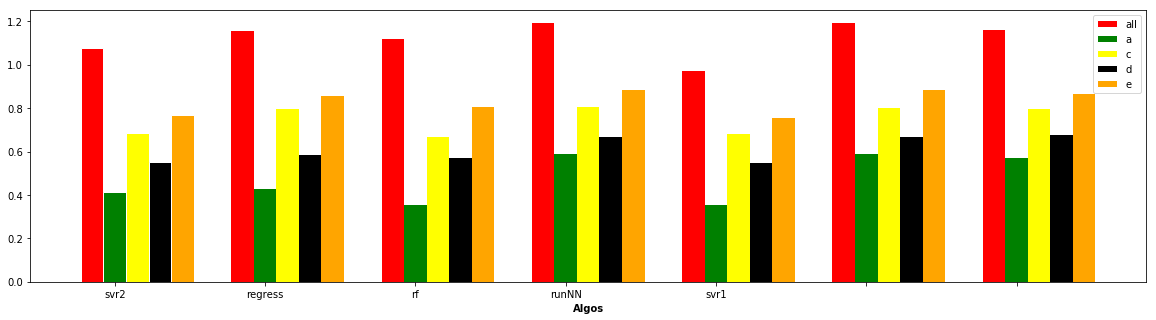

In [31]:

width = 0.15 

r1 = np.arange(len(mae_a))
r2 = [x + width for x in r1]
#r3 = [x + width for x in r2]
r4 = [x + width for x in r2]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]


fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(r1, mae.values(), color='red', width=width, edgecolor='white', label='all')
plt.bar(r2, mae_a.values(), color='green', width=width, edgecolor='white', label='a')
#plt.bar(r3, mae_b.values(), color='blue', width=width, edgecolor='white', label='b')
plt.bar(r4, mae_c.values(), color='yellow', width=width, edgecolor='white', label='c')
plt.bar(r5, mae_d.values(), color='black', width=width, edgecolor='white', label='d')
plt.bar(r6, mae_e.values(), color='orange', width=width, edgecolor='white', label='e')


plt.xlabel('Algos', fontweight='bold')
plt.xticks([r + width for r in range(len(mae_a))], ['svr2', 'regress', 'rf', 'runNN', 'svr1'])
plt.legend()



# Multivariable Analysis

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


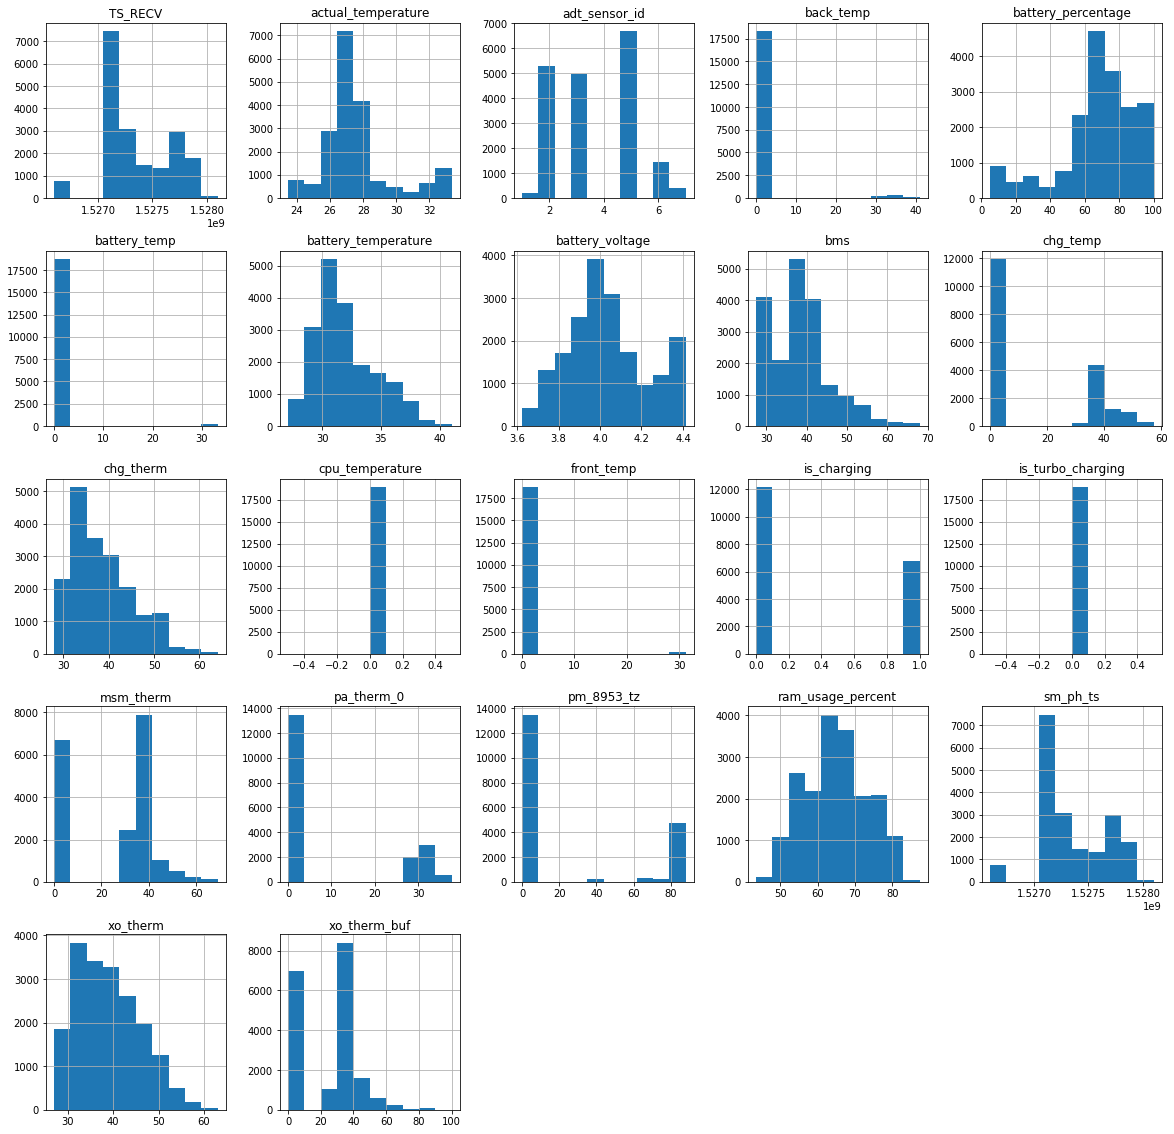

In [32]:
df_new = df.dropna(subset=['battery_temp'])
df_new.describe()
df_new.loc[df_new['ram_usage_percent'] == 0, 'ram_usage_percent'] = None
df_new.dropna(subset=['ram_usage_percent'], inplace=True)
hist=df_new.hist(bins=10, figsize=(20, 20))
df_new.drop(columns=['xo_therm_buf', 'msm_therm', 'sensor_id', 'cpu_temperature', 'adt_sensor_id', 'TS_RECV', 'sm_ph_ts', 'is_turbo_charging', 'battery_temp', 'back_temp', 'front_temp', 'pa_therm_0', 'pm_8953_tz'], inplace=True)

In [33]:
df_mac_a_new = df_new[df_new['sm_ph_mac_id'] == '2c:4d:54:3f:31:d6']
df_mac_b_new = df_new[df_new['sm_ph_mac_id'] == '48:88:ca:be:cb:ee']
df_mac_c_new = df_new[df_new['sm_ph_mac_id'] == 'd4:63:c6:26:72:2a']
df_mac_d_new = df_new[df_new['sm_ph_mac_id'] == 'f4:f5:db:94:93:df']
df_mac_e_new = df_new[df_new['sm_ph_mac_id'] == '54:b8:2:14:56:eb']

X_new = df_new.drop(columns=['sm_ph_mac_id', 'actual_temperature']).values
X_a_new = df_mac_a_new.drop(columns=['sm_ph_mac_id', 'actual_temperature']).values
#X_b_new = df_mac_b_new.drop(columns=['sm_ph_mac_id', 'actual_temperature']).values
X_c_new = df_mac_c_new.drop(columns=['sm_ph_mac_id', 'actual_temperature']).values
X_d_new = df_mac_d_new.drop(columns=['sm_ph_mac_id', 'actual_temperature']).values
X_e_new = df_mac_e_new.drop(columns=['sm_ph_mac_id', 'actual_temperature']).values

y_new = df_new['actual_temperature'].values
y_a_new = df_mac_a_new['actual_temperature'].values
#y_b = df_mac_b_new['actual_temperature'].values
y_c_new = df_mac_c_new['actual_temperature'].values
y_d_new = df_mac_d_new['actual_temperature'].values
y_e_new = df_mac_e_new['actual_temperature'].values

y_a_c = np.append(df_mac_a['actual_temperature'].values, df_mac_c['actual_temperature'].values)

print(y_a_new.shape, y_d_new.shape, y_e_new.shape, y_new.shape)

(4964,) (5273,) (6685,) (18951,)


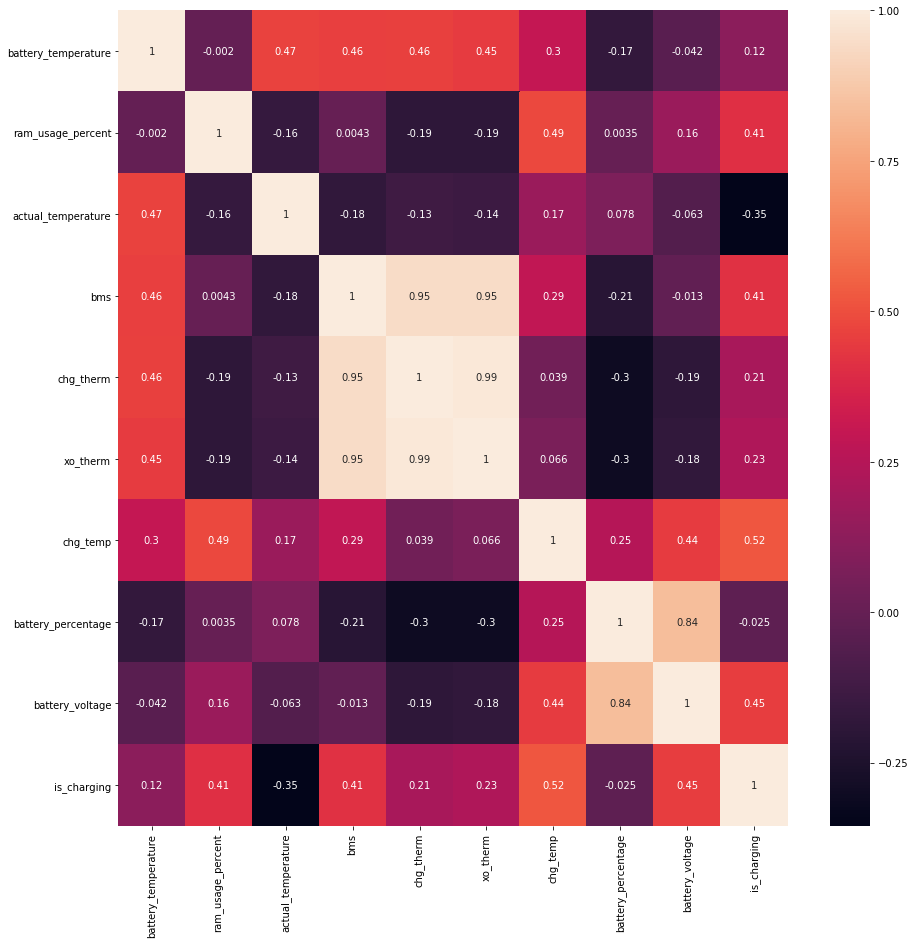

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
corr = df_new.corr()
sns.heatmap(corr, 
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)
plt.show()

In [35]:
df_new['is_charging'].value_counts()

0.0    12183
1.0     6768
Name: is_charging, dtype: int64

In [36]:
X_charging = df_new[df['is_charging'] == 1.0]['battery_temperature']
y_charging = df_new[df['is_charging'] == 1.0]['actual_temperature']
X_nocharging = df_new[df['is_charging'] == 0.0]['battery_temperature']
y_nocharging = df_new[df['is_charging'] == 0.0]['actual_temperature']
print(X_charging.shape, y_charging.shape, X_nocharging.shape, y_nocharging.shape)

(6768,) (6768,) (12183,) (12183,)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


(5414, 1)
================= regress =================
================SKLEARN==============
lr time 0.006125211715698242
================STATSMODELS==============


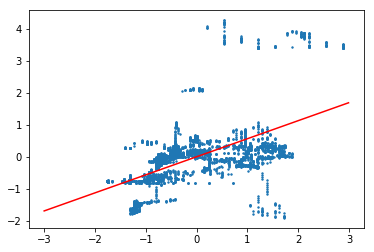

MAE : 0.9143487225802576
================= runNN =================
Train on 4331 samples, validate on 1083 samples
Epoch 1/8
4331/4331 [==============================] - 1s 222us/step - loss: 0.8117 - val_loss: 0.6373
Epoch 2/8
4331/4331 [==============================] - 1s 147us/step - loss: 0.7029 - val_loss: 0.6111
Epoch 3/8
4331/4331 [==============================] - 1s 128us/step - loss: 0.6815 - val_loss: 0.5949
Epoch 4/8
4331/4331 [==============================] - 1s 151us/step - loss: 0.6653 - val_loss: 0.5765
Epoch 5/8
4331/4331 [==============================] - 1s 141us/step - loss: 0.6500 - val_loss: 0.5621
Epoch 6/8
4331/4331 [==============================] - 1s 134us/step - loss: 0.6388 - val_loss: 0.5487
Epoch 7/8
4331/4331 [==============================] - 1s 136us/step - loss: 0.6298 - val_loss: 0.5394
Epoch 8/8
4331/4331 [==============================] - 1s 135us/step - loss: 0.6231 - val_loss: 0.5313
nn time 5.49166464805603


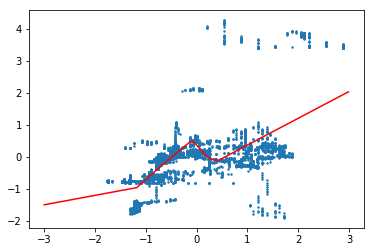

MAE : 0.8037439377529758
================= randomforest =================
rf time 0.0378108024597168


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


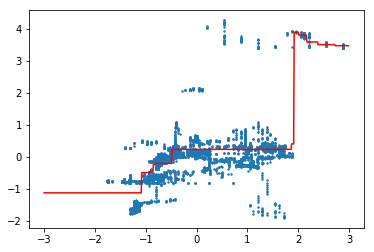

MAE : 0.6079218801539837
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 17.4815514087677


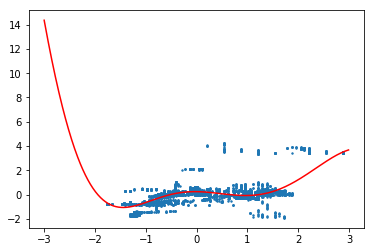

MAE : 0.6981338554758321
================= knn =================


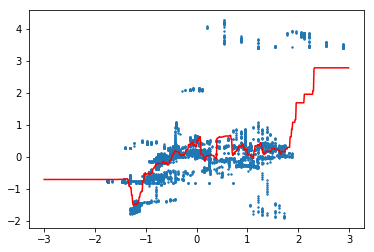

MAE : 0.6178970679468241
================= ridge =================


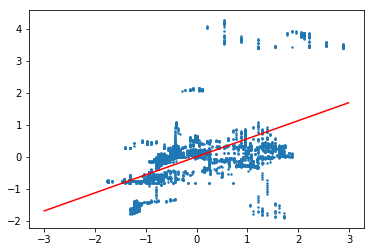

MAE : 0.9143051357155231
================= ransac =================


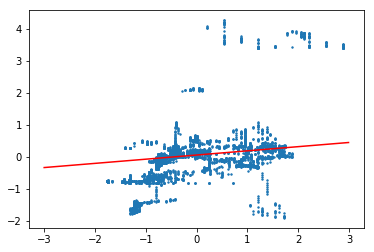

MAE : 0.9099970444965971
(9746, 1)
================= regress =================
================SKLEARN==============
lr time 0.0009186267852783203
================STATSMODELS==============


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


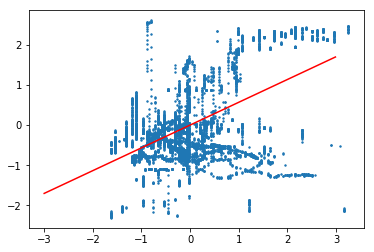

MAE : 1.2654176408860358
================= runNN =================
Train on 7796 samples, validate on 1950 samples
Epoch 1/8
7796/7796 [==============================] - 1s 168us/step - loss: 0.6795 - val_loss: 0.6948
Epoch 2/8
7796/7796 [==============================] - 1s 141us/step - loss: 0.6415 - val_loss: 0.6804
Epoch 3/8
7796/7796 [==============================] - 1s 147us/step - loss: 0.6366 - val_loss: 0.6799
Epoch 4/8
7796/7796 [==============================] - 1s 151us/step - loss: 0.6348 - val_loss: 0.6776
Epoch 5/8
7796/7796 [==============================] - 1s 165us/step - loss: 0.6309 - val_loss: 0.6777
Epoch 6/8
7796/7796 [==============================] - 1s 178us/step - loss: 0.6247 - val_loss: 0.6847
Epoch 7/8
7796/7796 [==============================] - 1s 172us/step - loss: 0.6244 - val_loss: 0.6678
Epoch 8/8
7796/7796 [==============================] - 1s 174us/step - loss: 0.6206 - val_loss: 0.6831
nn time 10.666178703308105


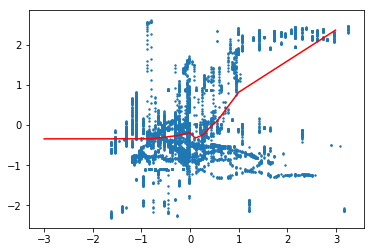

MAE : 1.1151540393477146
================= randomforest =================
rf time 0.03842020034790039


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


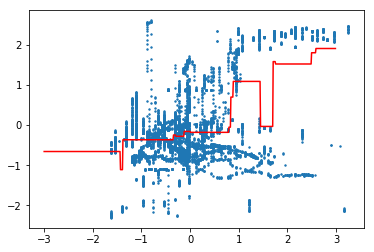

MAE : 1.0722984782285954
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 32.11694264411926


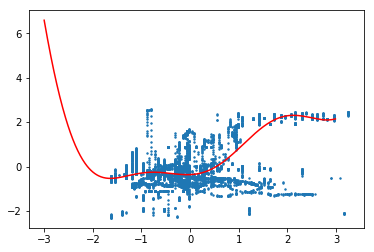

MAE : 1.0749072412327805
================= knn =================


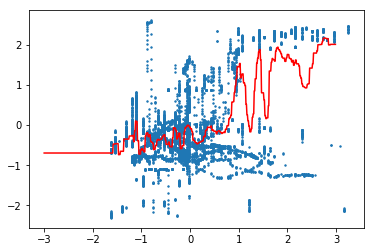

MAE : 0.9597454657365613
================= ridge =================


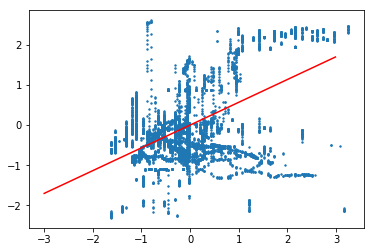

MAE : 1.265412675869437
================= ransac =================


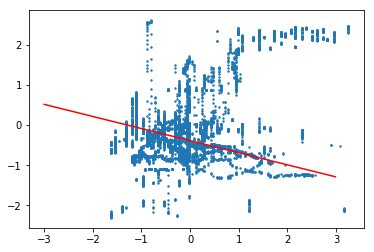

MAE : 1.5859994119359895


{'knn': 0.9597454657365613,
 'randomforest': 1.0722984782285954,
 'ransac': 1.5859994119359895,
 'regress': 1.2654176408860358,
 'ridge': 1.265412675869437,
 'runNN': 1.1151540393477146,
 'svr1': 1.0749072412327805}

In [37]:
runmodel(X_charging, y_charging, 'all')
runmodel(X_nocharging, y_nocharging, 'all')

In [38]:
X_new = df_new.drop(columns=['actual_temperature', 'sm_ph_mac_id'])
y_new = df_new['actual_temperature']
X_new.head()

,battery_temperature,ram_usage_percent,bms,chg_therm,xo_therm,chg_temp,battery_percentage,battery_voltage,is_charging
1050,31.7,70.928382,43.0,40.0,41.0,40.709999,49.0,4.051,0.0
1051,31.7,71.034483,43.0,39.0,40.0,39.877998,49.0,4.051,0.0
1052,31.7,71.087533,42.0,39.0,40.0,39.877998,49.0,4.051,0.0
1053,31.7,71.034483,42.0,39.0,40.0,39.535000,49.0,4.051,0.0
1054,31.7,71.140584,42.0,39.0,40.0,39.632999,49.0,4.051,0.0


In [39]:
mae_new = runmodel(X_new, y_new, 'all', n_input=X_new.shape[1], isPlot=False, epochs=40)

(15160, 9)
================= regress =================
================SKLEARN==============
lr time 0.04894208908081055
================STATSMODELS==============
MAE : 0.924186543350943
================= runNN =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Train on 12128 samples, validate on 3032 samples
Epoch 1/40
12128/12128 [==============================] - 2s 140us/step - loss: 0.4476 - val_loss: 0.2791
Epoch 2/40
12128/12128 [==============================] - 1s 82us/step - loss: 0.2087 - val_loss: 0.2184
Epoch 3/40
12128/12128 [==============================] - 2s 142us/step - loss: 0.1781 - val_loss: 0.1970
Epoch 4/40
12128/12128 [==============================] - 3s 221us/step - loss: 0.1619 - val_loss: 0.1817
Epoch 5/40
12128/12128 [==============================] - 2s 196us/step - loss: 0.1517 - val_loss: 0.1713
Epoch 6/40
12128/12128 [==============================] - 2s 175us/step - loss: 0.1445 - val_loss: 0.1642
Epoch 7/40
12128/12128 [==============================] - 2s 162us/step - loss: 0.1385 - val_loss: 0.1590
Epoch 8/40
12128/12128 [==============================] - 2s 164us/step - loss: 0.1337 - val_loss: 0.1515
Epoch 9/40
12128/12128 [==============================] - 3s 220us/step - loss: 0.1302 - val_loss: 0.148

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 399.24222898483276
MAE : 0.27342878130734205
================= knn =================
MAE : 0.42637174360327085
================= ridge =================
MAE : 0.9242149536378101
================= ransac =================
MAE : 1.2130986882627777


In [40]:
mae_new_a = runmodel(X_a_new, y_a_new, 'all', n_input=X_a_new.shape[1], isPlot=False, epochs=40)
mae_new_d = runmodel(X_d_new, y_d_new, 'all', n_input=X_d_new.shape[1], isPlot=False, epochs=40)
mae_new_e = runmodel(X_e_new, y_e_new, 'all', n_input=X_e_new.shape[1], isPlot=False, epochs=40)

(3971, 9)
================= regress =================
================SKLEARN==============
lr time 0.0027053356170654297
================STATSMODELS==============
MAE : 0.39256684460235264
================= runNN =================
Train on 3176 samples, validate on 795 samples
Epoch 1/40
3176/3176 [==============================] - 1s 294us/step - loss: 0.6555 - val_loss: 0.3493
Epoch 2/40
3176/3176 [==============================] - 1s 171us/step - loss: 0.3073 - val_loss: 0.2506
Epoch 3/40
3176/3176 [==============================] - 0s 78us/step - loss: 0.2487 - val_loss: 0.2158
Epoch 4/40
3176/3176 [==============================] - 1s 180us/step - loss: 0.2175 - val_loss: 0.1936
Epoch 5/40
3176/3176 [==============================] - 0s 83us/step - loss: 0.1976 - val_loss: 0.1795
Epoch 6/40
3176/3176 [==============================] - 0s 78us/step - loss: 0.1814 - val_loss: 0.1653
Epoch 7/40
3176/3176 [==============================] - 0s 75us/step - loss: 0.1698 - val_loss: 0.16

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 39.589597940444946
MAE : 0.12851704879269896
================= knn =================
MAE : 0.2170280312185296
================= ridge =================
MAE : 0.39254888379712094
================= ransac =================
MAE : 0.39607807063253786
(4218, 9)
================= regress =================
================SKLEARN==============
lr time 0.0016570091247558594
================STATSMODELS==============
MAE : 0.6297206422640705
================= runNN =================
Train on 3374 samples, validate on 844 samples
Epoch 1/40
3374/3374 [==============================] - 1s 332us/step - loss: 0.8932 - val_loss: 0.9661
Epoch 2/40
3374/3374 [==============================] - 0s 139us/step - loss: 0.7706 - val_loss: 0.9062
Epoch 3/40
3374/3374 [==============================] - 1s 203us/step - loss: 0.7193 - val_loss: 0.8611
Epoch 4/40
3374/3374 [==============================] - 1s 191us/step - loss: 0.6778 - val_loss: 0.8046
Epoch 5/40
3374/3374 [==============================] -

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 41.73974108695984
MAE : 0.20700915642161755
================= knn =================
MAE : 0.4811398578199052
================= ridge =================
MAE : 0.6294793672933218
================= ransac =================
MAE : 0.7548656448421216
(5348, 9)
================= regress =================
================SKLEARN==============
lr time 0.004797697067260742
================STATSMODELS==============
MAE : 0.818075876075523
================= runNN =================
Train on 4278 samples, validate on 1070 samples
Epoch 1/40
4278/4278 [==============================] - 1s 167us/step - loss: 0.9776 - val_loss: 0.8295
Epoch 2/40
4278/4278 [==============================] - 0s 76us/step - loss: 0.8340 - val_loss: 0.7853
Epoch 3/40
4278/4278 [==============================] - 0s 77us/step - loss: 0.7894 - val_loss: 0.7250
Epoch 4/40
4278/4278 [==============================] - 0s 76us/step - loss: 0.6842 - val_loss: 0.5978
Epoch 5/40
4278/4278 [==============================] - 0s 75u

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 75.17314004898071
MAE : 0.34171919170739246
================= knn =================
MAE : 0.5829034517576664
================= ridge =================
MAE : 0.8178864831354812
================= ransac =================
MAE : 0.8072492503308769


In [41]:
from pykalman import KalmanFilter
import numpy as np
kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
kf = kf.em(measurements, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)
print(filtered_state_means, filtered_state_covariances, smoothed_state_means, smoothed_state_covariances)

[[-0.6324354   0.48725999]
 [-0.08139661  0.36348947]
 [-1.72967476  0.29641685]] [[[ 0.24370821 -0.0516493 ]
  [-0.0516493   0.10687374]]

 [[ 0.91300854  0.03477466]
  [ 0.03477466  0.32219933]]

 [[ 1.16033437  0.11983719]
  [ 0.11983719  0.41791538]]] [[-0.67441149  0.39899312]
 [-0.81992226  0.19109279]
 [-1.72967476  0.29641685]] [[[ 0.22959645 -0.05069643]
  [-0.05069643  0.09444809]]

 [[ 0.72264751 -0.02814856]
  [-0.02814856  0.25053408]]

 [[ 1.16033437  0.11983719]
  [ 0.11983719  0.41791538]]]


In [42]:
df_new['sm_ph_mac_id'].value_counts()

54:b8:2:14:56:eb     6685
f4:f5:db:94:93:df    5273
2c:4d:54:3f:31:d6    4964
78:2:f8:93:f:85      1425
80:ad:16:c9:da:32     397
d4:63:c6:26:72:2a     207
Name: sm_ph_mac_id, dtype: int64

In [43]:
df_new = df.dropna(subset=['battery_temp'])
df_new.describe()
df_new.loc[df_new['ram_usage_percent'] == 0, 'ram_usage_percent'] = None
df_new.dropna(subset=['ram_usage_percent'], inplace=True)
df_new.drop(columns=['xo_therm_buf', 'msm_therm', 'sensor_id', 'cpu_temperature', 'adt_sensor_id', 'TS_RECV', 'is_turbo_charging', 'battery_temp', 'back_temp', 'front_temp', 'pa_therm_0', 'pm_8953_tz'], inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:
df_new_kf = df_new[df_new['sm_ph_mac_id'] == '2c:4d:54:3f:31:d6']

In [45]:
df_new_kf.drop(columns=['sm_ph_mac_id'], inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


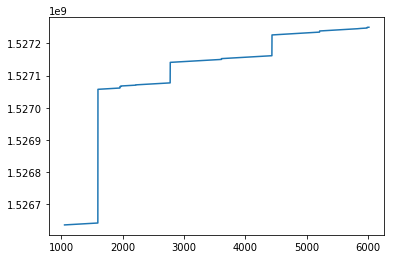

In [46]:
df_new_kf['sm_ph_ts'].plot()
df_new_kf['sm_ph_ts'] = pd.to_datetime(df_new_kf['sm_ph_ts'], unit='ms')
X_kf = df_new_kf['battery_temperature']
y_kf = df_new_kf['actual_temperature']

In [47]:
def draw_date_coloured_scatterplot(X, y):
    """
    Create a scatterplot of the two ETF prices, which is
    coloured by the date of the price to indicate the
    changing relationship between the sets of prices
    """
    # Create a yellow-to-red colourmap where yellow indicates
    # early dates and red indicates later dates
    plen = len(X)
    colour_map = plt.cm.get_cmap('YlOrRd')
    colours = np.linspace(0.1, 1, plen)

    # Create the scatterplot object
    scatterplot = plt.scatter(
        X, y,
        s=30, c=colours, cmap=colour_map,
        edgecolor='k', alpha=0.8
    )

    # Add a colour bar for the date colouring and set the
    # corresponding axis tick labels to equal string-formatted dates
    colourbar = plt.colorbar(scatterplot)
    #colourbar.ax.set_yticklabels(
    #    [str(p.date()) for p in prices[::plen//9].index]
    #)
    plt.show()

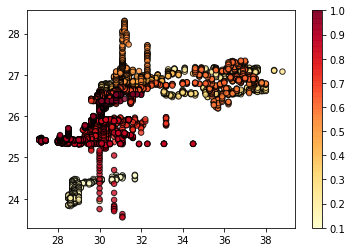

In [48]:
draw_date_coloured_scatterplot(X_kf, y_kf)

In [49]:
def calc_slope_intercept_kalman(X, y):
    """
    Utilise the Kalman Filter from the pyKalman package
    to calculate the slope and intercept of the regressed
    ETF prices.
    """
    delta = 1e-5
    trans_cov = delta / (1 - delta) * np.eye(2)
    obs_mat = np.vstack(
        [X, np.ones(X.shape)]
    ).T[:, np.newaxis]

    kf = KalmanFilter(
        n_dim_obs=1,
        n_dim_state=2,
        initial_state_mean=np.zeros(2),
        initial_state_covariance=np.ones((2, 2)),
        transition_matrices=np.eye(2),
        observation_matrices=obs_mat,
        observation_covariance=1.0,
        transition_covariance=trans_cov
    )

    state_means, state_covs = kf.filter(y.values)
    return state_means, state_covs

In [50]:
def draw_slope_intercept_changes(state_means):
    """
    Plot the slope and intercept changes from the
    Kalman Filte calculated values.
    """
    pd.DataFrame(
        dict(
            slope=state_means[:, 0],
            intercept=state_means[:, 1]
        )
    ).plot(subplots=True)
    plt.show()
    

In [51]:
state_means, state_covs = calc_slope_intercept_kalman(X_kf, y_kf)

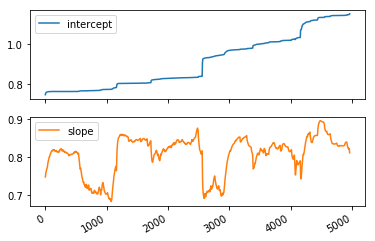

In [52]:
draw_slope_intercept_changes(state_means)

In [53]:
df_new.drop(columns=['sm_ph_mac_id', 'sm_ph_ts'], inplace=True)
df_new.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,battery_temperature,ram_usage_percent,actual_temperature,bms,chg_therm,xo_therm,chg_temp,battery_percentage,battery_voltage,is_charging
1050,31.7,70.928382,24.469,43.0,40.0,41.0,40.709999,49.0,4.051,0.0
1051,31.7,71.034483,24.484,43.0,39.0,40.0,39.877998,49.0,4.051,0.0
1052,31.7,71.087533,24.547,42.0,39.0,40.0,39.877998,49.0,4.051,0.0
1053,31.7,71.034483,24.578,42.0,39.0,40.0,39.535000,49.0,4.051,0.0
1054,31.7,71.140584,24.563,42.0,39.0,40.0,39.632999,49.0,4.051,0.0


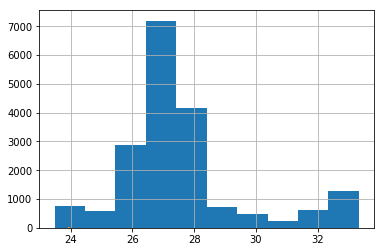

In [54]:
df_new['actual_temperature'].hist()
df_1 = df_new[(df_new['actual_temperature'] > 23) & (df_new['actual_temperature'] < 24)].sample(50)
df_2 = df_new[(df_new['actual_temperature'] > 24) & (df_new['actual_temperature'] < 25)].sample(100)
df_3 = df_new[(df_new['actual_temperature'] > 25) & (df_new['actual_temperature'] < 26)].sample(500)
df_4 = df_new[(df_new['actual_temperature'] > 26) & (df_new['actual_temperature'] < 27)].sample(2000)
df_5 = df_new[(df_new['actual_temperature'] > 27) & (df_new['actual_temperature'] < 28)].sample(2000)
df_6 = df_new[(df_new['actual_temperature'] > 28) & (df_new['actual_temperature'] < 29)].sample(500)
df_7 = df_new[(df_new['actual_temperature'] > 29) & (df_new['actual_temperature'] < 30)].sample(100)

df_1['actual_temperature'].hist()

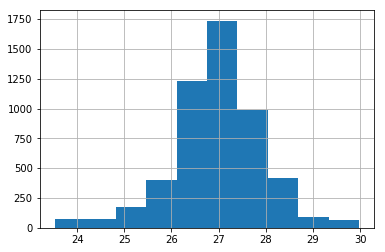

In [55]:
df_resampled = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], ignore_index=True)
df_resampled['actual_temperature'].hist()

In [56]:
X_resampled = df_resampled['battery_temperature']
y_resampled = df_resampled['actual_temperature']
y_resampled.shape

(5250,)

(4200, 1)
================= regress =================
================SKLEARN==============
lr time 0.0011472702026367188
================STATSMODELS==============


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


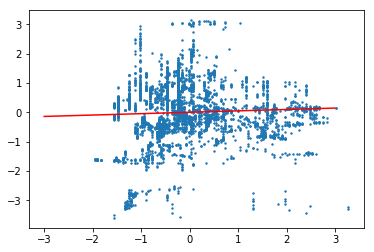

MAE : 0.6947908341046977
================= runNN =================
Train on 3360 samples, validate on 840 samples
Epoch 1/8
3360/3360 [==============================] - 1s 296us/step - loss: 0.9647 - val_loss: 0.8951
Epoch 2/8
3360/3360 [==============================] - 1s 213us/step - loss: 0.9446 - val_loss: 0.8825
Epoch 3/8
3360/3360 [==============================] - 0s 141us/step - loss: 0.9352 - val_loss: 0.8777
Epoch 4/8
3360/3360 [==============================] - 0s 144us/step - loss: 0.9304 - val_loss: 0.8748
Epoch 5/8
3360/3360 [==============================] - 1s 194us/step - loss: 0.9283 - val_loss: 0.8757
Epoch 6/8
3360/3360 [==============================] - 1s 169us/step - loss: 0.9266 - val_loss: 0.8779
Epoch 7/8
3360/3360 [==============================] - 1s 153us/step - loss: 0.9288 - val_loss: 0.8744
Epoch 8/8
3360/3360 [==============================] - 0s 138us/step - loss: 0.9249 - val_loss: 0.8727
nn time 5.095139503479004


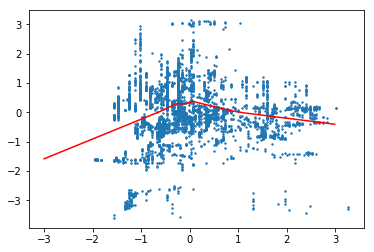

MAE : 0.7099063308425176
================= randomforest =================
rf time 0.033426523208618164


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


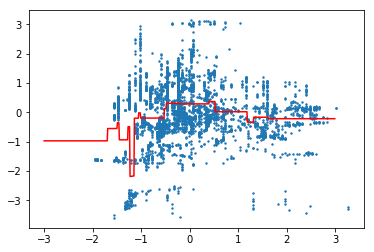

MAE : 0.6740776552248124
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 4.604430198669434


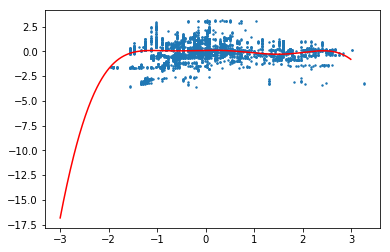

MAE : 0.682708129479038
================= knn =================


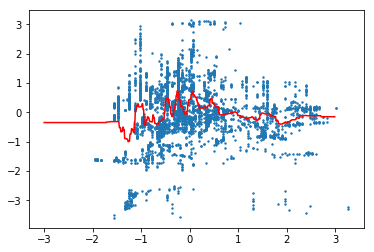

MAE : 0.6756087571428571
================= ridge =================


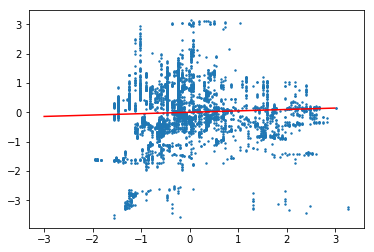

MAE : 0.6947898709439773
================= ransac =================


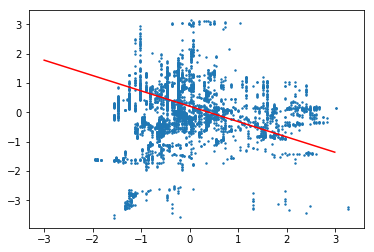

MAE : 0.8335613382665394


{'knn': 0.6756087571428571,
 'randomforest': 0.6740776552248124,
 'ransac': 0.8335613382665394,
 'regress': 0.6947908341046977,
 'ridge': 0.6947898709439773,
 'runNN': 0.7099063308425176,
 'svr1': 0.682708129479038}

In [57]:
runmodel(X_resampled, y_resampled, "all")

In [58]:
print(df_mac_a_new.shape)
df_avg = df_mac_a_new.groupby(np.arange(len(df_mac_a_new))//3).mean()
X_a_avg = df_avg.drop(columns=['actual_temperature']).values
y_a_avg = df_avg['actual_temperature'].values

(4964, 11)


In [59]:
mae_a_avg = runmodel(X_a_avg, y_a_avg, 'all', n_input=X_a_avg.shape[1], isPlot=False, epochs=40)
mae_a_new = runmodel(X_a_new, y_a_new, 'all', n_input=X_a_avg.shape[1], isPlot=False, epochs=40)
print(mae_a_avg, mae_a_new)

(1324, 9)
================= regress =================
================SKLEARN==============
lr time 0.001771688461303711
================STATSMODELS==============
MAE : 0.38906433470967666
================= runNN =================
Train on 1059 samples, validate on 265 samples
Epoch 1/40
1059/1059 [==============================] - 1s 672us/step - loss: 1.5851 - val_loss: 1.0324
Epoch 2/40
1059/1059 [==============================] - 0s 228us/step - loss: 0.8470 - val_loss: 0.7559
Epoch 3/40
1059/1059 [==============================] - 0s 157us/step - loss: 0.7091 - val_loss: 0.6591
Epoch 4/40
1059/1059 [==============================] - 0s 126us/step - loss: 0.6209 - val_loss: 0.5719
Epoch 5/40
1059/1059 [==============================] - 0s 306us/step - loss: 0.5452 - val_loss: 0.5021
Epoch 6/40
1059/1059 [==============================] - 0s 277us/step - loss: 0.4852 - val_loss: 0.4503
Epoch 7/40
1059/1059 [==============================] - 0s 248us/step - loss: 0.4399 - val_loss: 0

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 6.139437198638916
MAE : 0.14493913090208815
================= knn =================
MAE : 0.3597083685800604
================= ridge =================
MAE : 0.3893230533435844
================= ransac =================
MAE : 0.3851050262090259
(3971, 9)
================= regress =================
================SKLEARN==============
lr time 0.001577615737915039
================STATSMODELS==============
MAE : 0.41138644744774633
================= runNN =================
Train on 3176 samples, validate on 795 samples
Epoch 1/40
3176/3176 [==============================] - 1s 324us/step - loss: 0.6011 - val_loss: 0.4895
Epoch 2/40
3176/3176 [==============================] - 0s 143us/step - loss: 0.3635 - val_loss: 0.3519
Epoch 3/40
3176/3176 [==============================] - 1s 174us/step - loss: 0.2562 - val_loss: 0.2673
Epoch 4/40
3176/3176 [==============================] - 0s 83us/step - loss: 0.1949 - val_loss: 0.2198
Epoch 5/40
3176/3176 [==============================] - 0s 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 41.23412775993347
MAE : 0.13153408704678315
================= knn =================
MAE : 0.22375637462235645
================= ridge =================
MAE : 0.4111602323038525
================= ransac =================
MAE : 0.40387384042909025
{'svr1': 0.14493913090208815, 'runNN': 0.24753794704103035, 'randomforest': 0.20511067997083535, 'ridge': 0.3893230533435844, 'knn': 0.3597083685800604, 'regress': 0.38906433470967666, 'ransac': 0.3851050262090259} {'svr1': 0.13153408704678315, 'runNN': 0.18150066295059072, 'randomforest': 0.2073915684042425, 'ridge': 0.4111602323038525, 'knn': 0.22375637462235645, 'regress': 0.41138644744774633, 'ransac': 0.40387384042909025}


(20853, 1)
================= regress =================
================SKLEARN==============
lr time 0.0016644001007080078
================STATSMODELS==============


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


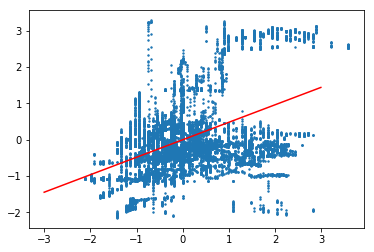

MAE : 1.196537862152694
================= runNN =================
Train on 16682 samples, validate on 4171 samples
Epoch 1/8
16682/16682 [==============================] - 4s 212us/step - loss: 0.7801 - val_loss: 0.7651
Epoch 2/8
16682/16682 [==============================] - 2s 120us/step - loss: 0.7685 - val_loss: 0.7626
Epoch 3/8
16682/16682 [==============================] - 3s 161us/step - loss: 0.7669 - val_loss: 0.7629
Epoch 4/8
16682/16682 [==============================] - 3s 177us/step - loss: 0.7669 - val_loss: 0.7596
Epoch 5/8
16682/16682 [==============================] - 3s 151us/step - loss: 0.7662 - val_loss: 0.7587
Epoch 6/8
16682/16682 [==============================] - 2s 145us/step - loss: 0.7654 - val_loss: 0.7614
Epoch 7/8
16682/16682 [==============================] - 2s 117us/step - loss: 0.7649 - val_loss: 0.7580
Epoch 8/8
16682/16682 [==============================] - 3s 160us/step - loss: 0.7646 - val_loss: 0.7635
nn time 21.15200161933899


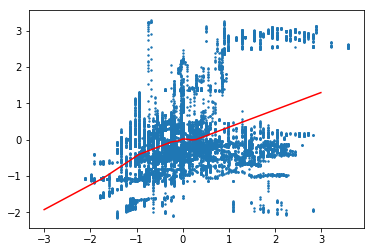

MAE : 1.1680063465353991
================= randomforest =================
rf time 0.03644537925720215


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


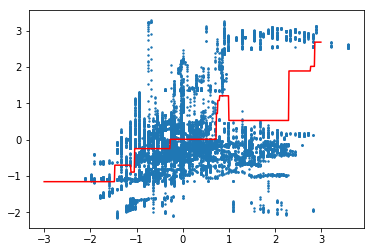

MAE : 1.1256408607951736
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 81.39289283752441


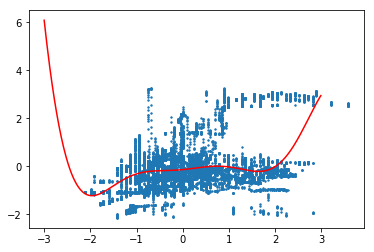

MAE : 1.08197416298514
================= knn =================


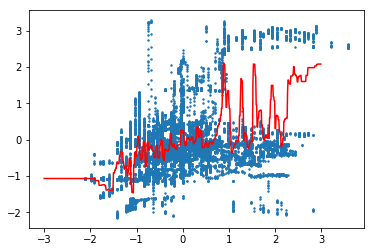

MAE : 0.9812394246260069
================= ridge =================


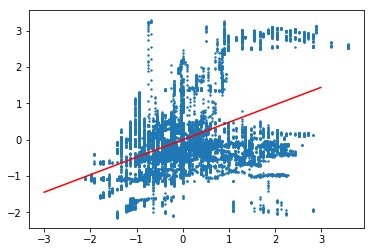

MAE : 1.196533288120933
================= ransac =================


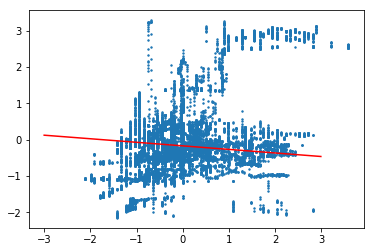

MAE : 1.1972429875234192
(20853, 1)
================= regress =================
================SKLEARN==============
lr time 0.001341104507446289
================STATSMODELS==============


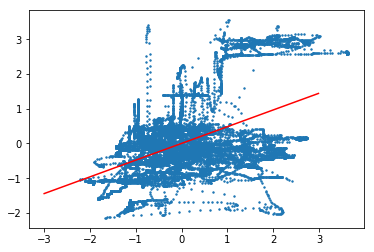

MAE : 1.185697357834561
================= runNN =================
Train on 16682 samples, validate on 4171 samples
Epoch 1/8
16682/16682 [==============================] - 3s 176us/step - loss: 0.7876 - val_loss: 0.7456
Epoch 2/8
16682/16682 [==============================] - 3s 159us/step - loss: 0.7702 - val_loss: 0.7452
Epoch 3/8
16682/16682 [==============================] - 3s 155us/step - loss: 0.7680 - val_loss: 0.7431
Epoch 4/8
16682/16682 [==============================] - 2s 132us/step - loss: 0.7666 - val_loss: 0.7412
Epoch 5/8
16682/16682 [==============================] - 2s 133us/step - loss: 0.7656 - val_loss: 0.7404
Epoch 6/8
16682/16682 [==============================] - 2s 126us/step - loss: 0.7653 - val_loss: 0.7380
Epoch 7/8
16682/16682 [==============================] - 3s 172us/step - loss: 0.7632 - val_loss: 0.7370
Epoch 8/8
16682/16682 [==============================] - 2s 136us/step - loss: 0.7617 - val_loss: 0.7365
nn time 20.047983646392822


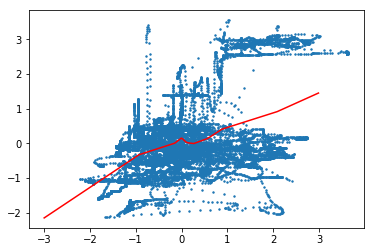

MAE : 1.1696627920315983
================= randomforest =================
rf time 0.0717611312866211


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


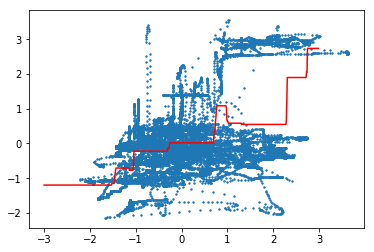

MAE : 1.1202320748040664
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 83.4113290309906


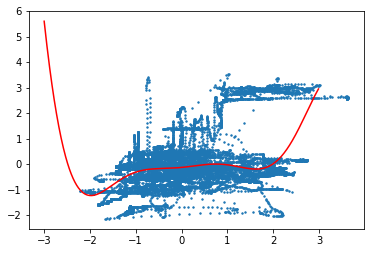

MAE : 1.0855856534112018
================= knn =================


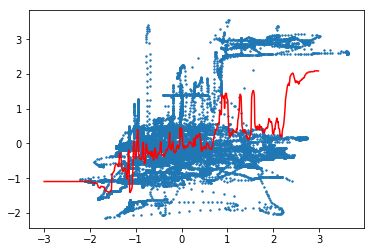

MAE : 1.012808869059284
================= ridge =================


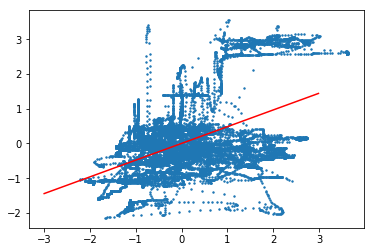

MAE : 1.1856939395731507
================= ransac =================


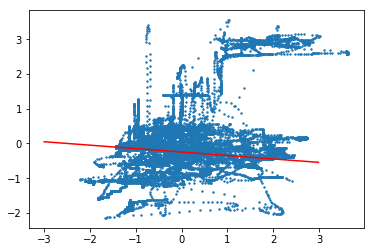

MAE : 1.2149971251058755
{'svr1': 1.08197416298514, 'runNN': 1.1680063465353991, 'randomforest': 1.1256408607951736, 'ridge': 1.196533288120933, 'knn': 0.9812394246260069, 'regress': 1.196537862152694, 'ransac': 1.1972429875234192} {'svr1': 1.0855856534112018, 'runNN': 1.1696627920315983, 'randomforest': 1.1202320748040664, 'ridge': 1.1856939395731507, 'knn': 1.012808869059284, 'regress': 1.185697357834561, 'ransac': 1.2149971251058755}


In [60]:
from scipy.signal import savgol_filter

X_fil = savgol_filter(X.reshape(-1,), 31, 2)
y_fil = savgol_filter(y, 31, 2)

mae_a = runmodel(X, y, "all")
mae_fil = runmodel(X_fil, y_fil, "all")
print(mae_a, mae_fil)

In [61]:
print(X.shape, y.shape)
xy = pd.DataFrame({'X': X.reshape(-1,), 'y': y})
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.1
ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(xy)

(26067, 1) (26067,)


EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [62]:
pred = ell.predict(xy)
sum(pred == -1)
xy[pred == -1] = None

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


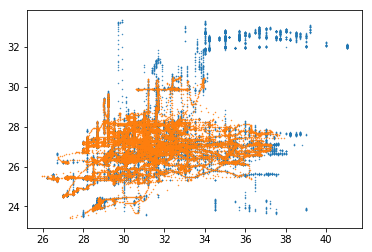

In [63]:
xy.dropna(inplace=True)
X_clean, y_clean = xy['X'], xy['y']
X_fil = savgol_filter(X_clean.reshape(-1,), 31, 2)
y_fil = savgol_filter(y_clean, 31, 2)
plt.scatter(X, y, s=0.2)
plt.scatter(X_fil, y_fil, s=0.2)

(20853, 1)
================= regress =================
================SKLEARN==============
lr time 0.0018575191497802734
================STATSMODELS==============


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


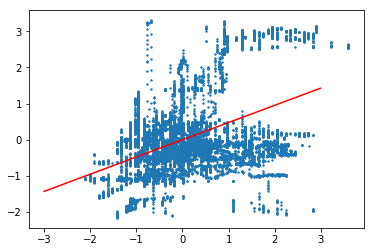

MAE : 1.200629345756677
================= runNN =================
Train on 16682 samples, validate on 4171 samples
Epoch 1/80
16682/16682 [==============================] - 3s 159us/step - loss: 0.8034 - val_loss: 0.7597
Epoch 2/80
16682/16682 [==============================] - 2s 100us/step - loss: 0.7729 - val_loss: 0.7582
Epoch 3/80
16682/16682 [==============================] - 2s 129us/step - loss: 0.7722 - val_loss: 0.7600
Epoch 4/80
16682/16682 [==============================] - 2s 98us/step - loss: 0.7715 - val_loss: 0.7617
Epoch 5/80
16682/16682 [==============================] - 2s 97us/step - loss: 0.7714 - val_loss: 0.7665
Epoch 6/80
16682/16682 [==============================] - 2s 124us/step - loss: 0.7716 - val_loss: 0.7573
Epoch 7/80
16682/16682 [==============================] - 2s 114us/step - loss: 0.7706 - val_loss: 0.7576
Epoch 8/80
16682/16682 [==============================] - 2s 110us/step - loss: 0.7699 - val_loss: 0.7571
Epoch 9/80
16682/16682 [===============

Epoch 77/80
16682/16682 [==============================] - 2s 130us/step - loss: 0.7271 - val_loss: 0.7104
Epoch 78/80
16682/16682 [==============================] - 3s 155us/step - loss: 0.7260 - val_loss: 0.7173
Epoch 79/80
16682/16682 [==============================] - 2s 102us/step - loss: 0.7263 - val_loss: 0.7147
Epoch 80/80
16682/16682 [==============================] - 2s 116us/step - loss: 0.7259 - val_loss: 0.7108
nn time 164.6426272392273


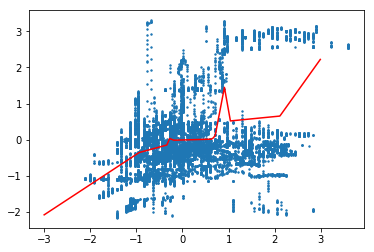

MAE : 1.1495498146288323
================= randomforest =================
rf time 0.0845644474029541


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


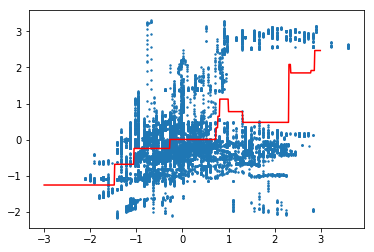

MAE : 1.1230592365137582
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 82.41448426246643


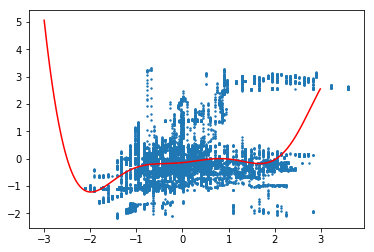

MAE : 1.0911179975318646
================= knn =================


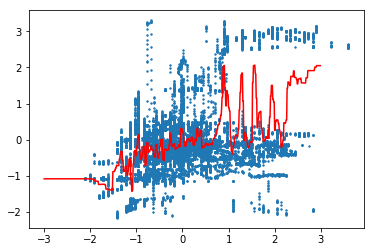

MAE : 0.97649973053318
================= ridge =================


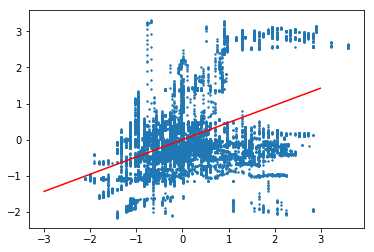

MAE : 1.2006260941566818
================= ransac =================


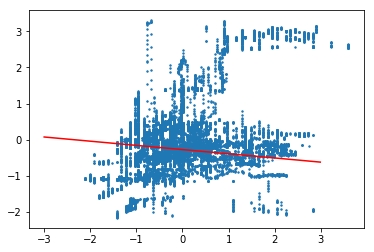

MAE : 1.2460637000098849
(18769, 1)
================= regress =================
================SKLEARN==============
lr time 0.001401662826538086
================STATSMODELS==============


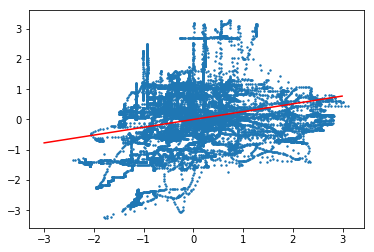

MAE : 0.8117137265724275
================= runNN =================
Train on 15015 samples, validate on 3754 samples
Epoch 1/80
15015/15015 [==============================] - 2s 166us/step - loss: 0.8821 - val_loss: 0.8420
Epoch 2/80
15015/15015 [==============================] - 2s 106us/step - loss: 0.8285 - val_loss: 0.8365
Epoch 3/80
15015/15015 [==============================] - 3s 167us/step - loss: 0.8262 - val_loss: 0.8332
Epoch 4/80
15015/15015 [==============================] - 1s 100us/step - loss: 0.8230 - val_loss: 0.8322
Epoch 5/80
15015/15015 [==============================] - 1s 84us/step - loss: 0.8192 - val_loss: 0.8294
Epoch 6/80
15015/15015 [==============================] - 1s 83us/step - loss: 0.8175 - val_loss: 0.8277
Epoch 7/80
15015/15015 [==============================] - 3s 198us/step - loss: 0.8171 - val_loss: 0.8273
Epoch 8/80
15015/15015 [==============================] - 2s 137us/step - loss: 0.8157 - val_loss: 0.8293
Epoch 9/80
15015/15015 [==============

Epoch 77/80
15015/15015 [==============================] - 3s 170us/step - loss: 0.7962 - val_loss: 0.8131
Epoch 78/80
15015/15015 [==============================] - 2s 163us/step - loss: 0.7965 - val_loss: 0.8118
Epoch 79/80
15015/15015 [==============================] - 2s 129us/step - loss: 0.7961 - val_loss: 0.8173
Epoch 80/80
15015/15015 [==============================] - 2s 130us/step - loss: 0.7965 - val_loss: 0.8129
nn time 153.0214204788208


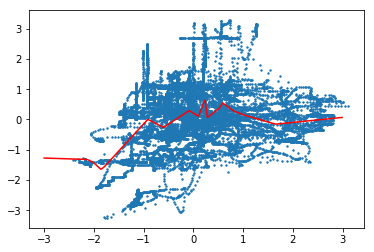

MAE : 0.7564790168611518
================= randomforest =================
rf time 0.0633389949798584


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


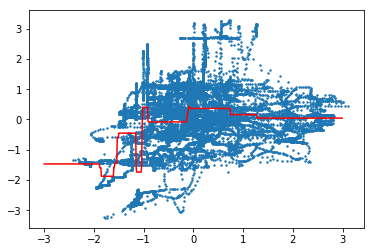

MAE : 0.7253133248767735
================= svr =================


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 54.0181610584259


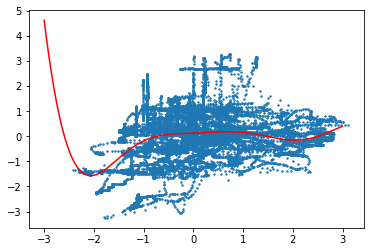

MAE : 0.7619045762523599
================= knn =================


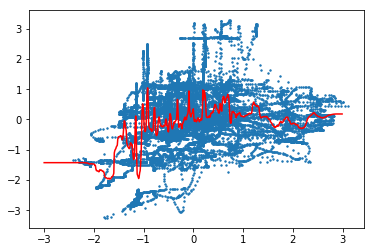

MAE : 0.6537972208803429
================= ridge =================


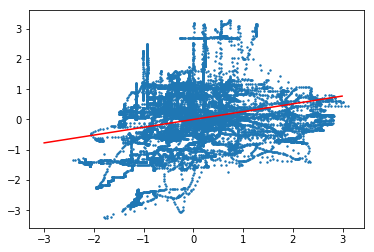

MAE : 0.8117119571453836
================= ransac =================


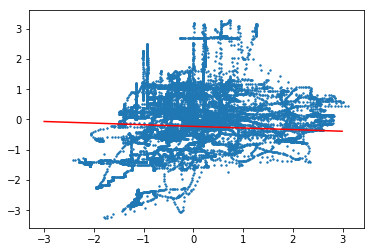

MAE : 0.856259086367512
{'svr1': 1.0911179975318646, 'runNN': 1.1495498146288323, 'randomforest': 1.1230592365137582, 'ridge': 1.2006260941566818, 'knn': 0.97649973053318, 'regress': 1.200629345756677, 'ransac': 1.2460637000098849} {'svr1': 0.7619045762523599, 'runNN': 0.7564790168611518, 'randomforest': 0.7253133248767735, 'ridge': 0.8117119571453836, 'knn': 0.6537972208803429, 'regress': 0.8117137265724275, 'ransac': 0.856259086367512}


In [64]:
mae = runmodel(X, y, "all", epochs=80)
mae_clean = runmodel(X_fil, y_fil, "all", epochs=80)
print(mae, mae_clean)


In [65]:
X_new
xy = X_new.join(y_new)
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.1
ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(xy)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [66]:
pred = ell.predict(xy)
sum(pred == -1)
xy[pred == -1] = None

In [67]:
xy.dropna(inplace=True)
X_clean, y_clean = xy.drop(columns=['actual_temperature']), xy['actual_temperature']
mae = runmodel(X_new, y_new, "all", epochs=80, n_input=X_new.shape[1], isPlot=False)
mae_clean = runmodel(X_clean, y_clean, "all", epochs=80, n_input=X_clean.shape[1], isPlot=False)
print(mae, mae_clean)


(15160, 9)
================= regress =================
================SKLEARN==============
lr time 0.0033490657806396484
================STATSMODELS==============
MAE : 0.9165405673431052
================= runNN =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Train on 12128 samples, validate on 3032 samples
Epoch 1/80
12128/12128 [==============================] - 3s 231us/step - loss: 0.3849 - val_loss: 0.2010
Epoch 2/80
12128/12128 [==============================] - 1s 85us/step - loss: 0.2081 - val_loss: 0.1729
Epoch 3/80
12128/12128 [==============================] - 1s 86us/step - loss: 0.1824 - val_loss: 0.1548
Epoch 4/80
12128/12128 [==============================] - 1s 86us/step - loss: 0.1672 - val_loss: 0.1474
Epoch 5/80
12128/12128 [==============================] - 1s 86us/step - loss: 0.1580 - val_loss: 0.1415
Epoch 6/80
12128/12128 [==============================] - 1s 84us/step - loss: 0.1510 - val_loss: 0.1361
Epoch 7/80
12128/12128 [==============================] - 1s 86us/step - loss: 0.1462 - val_loss: 0.1307
Epoch 8/80
12128/12128 [==============================] - 1s 84us/step - loss: 0.1432 - val_loss: 0.1310
Epoch 9/80
12128/12128 [==============================] - 1s 84us/step - loss: 0.1407 - val_loss: 0.1284
Epoch

12128/12128 [==============================] - 1s 85us/step - loss: 0.0943 - val_loss: 0.0942
Epoch 78/80
12128/12128 [==============================] - 1s 119us/step - loss: 0.0937 - val_loss: 0.0959
Epoch 79/80
12128/12128 [==============================] - 2s 134us/step - loss: 0.0945 - val_loss: 0.0942
Epoch 80/80
12128/12128 [==============================] - 2s 150us/step - loss: 0.0938 - val_loss: 0.0942
nn time 113.0946352481842
MAE : 0.4149576093894578
================= randomforest =================
rf time 0.11353874206542969
MAE : 0.6869875220914773
================= svr =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 381.2055013179779
MAE : 0.2688820955588323
================= knn =================
MAE : 0.4142043062516486
================= ridge =================
MAE : 0.9165755747975948
================= ransac =================
MAE : 1.181831921678615
(13644, 9)
================= regress =================
================SKLEARN==============
lr time 0.003790616989135742
================STATSMODELS==============
MAE : 0.8048373284427435
================= runNN =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Train on 10915 samples, validate on 2729 samples
Epoch 1/80
10915/10915 [==============================] - 2s 176us/step - loss: 0.7671 - val_loss: 0.5796
Epoch 2/80
10915/10915 [==============================] - 1s 123us/step - loss: 0.4710 - val_loss: 0.4686
Epoch 3/80
10915/10915 [==============================] - 1s 123us/step - loss: 0.3925 - val_loss: 0.3984
Epoch 4/80
10915/10915 [==============================] - 1s 123us/step - loss: 0.3569 - val_loss: 0.3781
Epoch 5/80
10915/10915 [==============================] - 1s 123us/step - loss: 0.3359 - val_loss: 0.3537
Epoch 6/80
10915/10915 [==============================] - 1s 123us/step - loss: 0.3209 - val_loss: 0.3367
Epoch 7/80
10915/10915 [==============================] - 1s 123us/step - loss: 0.3141 - val_loss: 0.3275
Epoch 8/80
10915/10915 [==============================] - 1s 123us/step - loss: 0.3057 - val_loss: 0.3187
Epoch 9/80
10915/10915 [==============================] - 1s 123us/step - loss: 0.3028 - val_loss: 0.31

10915/10915 [==============================] - 1s 101us/step - loss: 0.2319 - val_loss: 0.2376
Epoch 78/80
10915/10915 [==============================] - 1s 102us/step - loss: 0.2310 - val_loss: 0.2348
Epoch 79/80
10915/10915 [==============================] - 1s 100us/step - loss: 0.2308 - val_loss: 0.2400
Epoch 80/80
10915/10915 [==============================] - 1s 100us/step - loss: 0.2299 - val_loss: 0.2341
nn time 107.53548169136047
MAE : 0.46941106112481285
================= randomforest =================
rf time 0.09891080856323242
MAE : 0.7362093340294101
================= svr =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 348.6068685054779
MAE : 0.27861036310872805
================= knn =================
MAE : 0.44533406652989466
================= ridge =================
MAE : 0.8048278171672926
================= ransac =================
MAE : 0.9722566599929148
{'svr1': 0.2688820955588323, 'runNN': 0.4149576093894578, 'randomforest': 0.6869875220914773, 'ridge': 0.9165755747975948, 'knn': 0.4142043062516486, 'regress': 0.9165405673431052, 'ransac': 1.181831921678615} {'svr1': 0.27861036310872805, 'runNN': 0.46941106112481285, 'randomforest': 0.7362093340294101, 'ridge': 0.8048278171672926, 'knn': 0.44533406652989466, 'regress': 0.8048373284427435, 'ransac': 0.9722566599929148}


In [68]:
xy = X_new.join(y_new)
from sklearn.ensemble import IsolationForest
isf = IsolationForest(max_samples=X_new.shape[0], contamination=outlier_frac)
isf.fit(xy)
pred = ell.predict(xy)
print(sum(pred == -1))
xy[pred == -1] = None
xy.dropna(inplace=True)
X_clean, y_clean = xy.drop(columns=['actual_temperature']), xy['actual_temperature']
mae = runmodel(X_new, y_new, "all", epochs=80, n_input=X_new.shape[1], isPlot=False, )
mae_clean = runmodel(X_clean, y_clean, "all", epochs=80, n_input=X_clean.shape[1], isPlot=False)
print(mae, mae_clean)

1895
(15160, 9)
================= regress =================
================SKLEARN==============
lr time 0.003364086151123047
================STATSMODELS==============
MAE : 0.954284728702343
================= runNN =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Train on 12128 samples, validate on 3032 samples
Epoch 1/80
12128/12128 [==============================] - 2s 141us/step - loss: 0.5092 - val_loss: 0.2621
Epoch 2/80
12128/12128 [==============================] - 1s 84us/step - loss: 0.2204 - val_loss: 0.2026
Epoch 3/80
12128/12128 [==============================] - 1s 84us/step - loss: 0.1837 - val_loss: 0.1784
Epoch 4/80
12128/12128 [==============================] - 1s 85us/step - loss: 0.1638 - val_loss: 0.1637
Epoch 5/80
12128/12128 [==============================] - 1s 85us/step - loss: 0.1535 - val_loss: 0.1534
Epoch 6/80
12128/12128 [==============================] - 1s 85us/step - loss: 0.1470 - val_loss: 0.1493
Epoch 7/80
12128/12128 [==============================] - 1s 85us/step - loss: 0.1425 - val_loss: 0.1492
Epoch 8/80
12128/12128 [==============================] - 1s 85us/step - loss: 0.1385 - val_loss: 0.1424
Epoch 9/80
12128/12128 [==============================] - 1s 85us/step - loss: 0.1350 - val_loss: 0.1410
Epoch

12128/12128 [==============================] - 1s 85us/step - loss: 0.1005 - val_loss: 0.1041
Epoch 78/80
12128/12128 [==============================] - 1s 87us/step - loss: 0.1011 - val_loss: 0.1055
Epoch 79/80
12128/12128 [==============================] - 1s 92us/step - loss: 0.1009 - val_loss: 0.1072
Epoch 80/80
12128/12128 [==============================] - 1s 112us/step - loss: 0.1009 - val_loss: 0.1104
nn time 110.35720801353455
MAE : 0.4369939896591859
================= randomforest =================
rf time 0.1351633071899414
MAE : 0.6752989328732065
================= svr =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 419.65354585647583
MAE : 0.27388573794116516
================= knn =================
MAE : 0.42671794117647055
================= ridge =================
MAE : 0.9542900781634758
================= ransac =================
MAE : 1.2976171120197344
(13644, 9)
================= regress =================
================SKLEARN==============
lr time 0.004088401794433594
================STATSMODELS==============
MAE : 0.7991819333785585
================= runNN =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Train on 10915 samples, validate on 2729 samples
Epoch 1/80
10915/10915 [==============================] - 4s 349us/step - loss: 0.7931 - val_loss: 0.5728
Epoch 2/80
10915/10915 [==============================] - 3s 233us/step - loss: 0.5365 - val_loss: 0.4631
Epoch 3/80
10915/10915 [==============================] - 3s 245us/step - loss: 0.4448 - val_loss: 0.3900
Epoch 4/80
10915/10915 [==============================] - 3s 230us/step - loss: 0.3937 - val_loss: 0.3555
Epoch 5/80
10915/10915 [==============================] - 3s 302us/step - loss: 0.3680 - val_loss: 0.3436
Epoch 6/80
10915/10915 [==============================] - 2s 222us/step - loss: 0.3478 - val_loss: 0.3217
Epoch 7/80
10915/10915 [==============================] - 3s 275us/step - loss: 0.3306 - val_loss: 0.3083
Epoch 8/80
10915/10915 [==============================] - 1s 105us/step - loss: 0.3196 - val_loss: 0.3065
Epoch 9/80
10915/10915 [==============================] - 1s 98us/step - loss: 0.3140 - val_loss: 0.295

10915/10915 [==============================] - 2s 179us/step - loss: 0.1969 - val_loss: 0.2031
Epoch 78/80
10915/10915 [==============================] - 3s 300us/step - loss: 0.1969 - val_loss: 0.2123
Epoch 79/80
10915/10915 [==============================] - 3s 231us/step - loss: 0.1967 - val_loss: 0.2041
Epoch 80/80
10915/10915 [==============================] - 2s 167us/step - loss: 0.1959 - val_loss: 0.2083
nn time 149.17569589614868
MAE : 0.432897999587959
================= randomforest =================
rf time 0.1391294002532959
MAE : 0.7293820882016855
================= svr =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 349.61640548706055
MAE : 0.2889745962978363
================= knn =================
MAE : 0.44295953399765536
================= ridge =================
MAE : 0.7991674121248832
================= ransac =================
MAE : 0.7585959616125904
{'svr1': 0.27388573794116516, 'runNN': 0.4369939896591859, 'randomforest': 0.6752989328732065, 'ridge': 0.9542900781634758, 'knn': 0.42671794117647055, 'regress': 0.954284728702343, 'ransac': 1.2976171120197344} {'svr1': 0.2889745962978363, 'runNN': 0.432897999587959, 'randomforest': 0.7293820882016855, 'ridge': 0.7991674121248832, 'knn': 0.44295953399765536, 'regress': 0.7991819333785585, 'ransac': 0.7585959616125904}


In [69]:
xy = X_new.join(y_new)
from sklearn.neighbors import LocalOutlierFactor
isf = LocalOutlierFactor(n_neighbors=100, contamination=outlier_frac)
isf.fit(xy)
pred = ell.predict(xy)
print(sum(pred == -1))
xy[pred == -1] = None
xy.dropna(inplace=True)
X_clean, y_clean = xy.drop(columns=['actual_temperature']), xy['actual_temperature']
mae = runmodel(X_new, y_new, "all", epochs=80, n_input=X_new.shape[1], isPlot=False, )
mae_clean = runmodel(X_clean, y_clean, "all", epochs=80, n_input=X_clean.shape[1], isPlot=False)
print(mae, mae_clean)

1895
(15160, 9)
================= regress =================
================SKLEARN==============
lr time 0.004338264465332031
================STATSMODELS==============
MAE : 0.9592351483557223
================= runNN =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Train on 12128 samples, validate on 3032 samples
Epoch 1/80
12128/12128 [==============================] - 2s 198us/step - loss: 0.4568 - val_loss: 0.2395
Epoch 2/80
12128/12128 [==============================] - 1s 91us/step - loss: 0.2116 - val_loss: 0.2069
Epoch 3/80
12128/12128 [==============================] - 1s 91us/step - loss: 0.1858 - val_loss: 0.1863
Epoch 4/80
12128/12128 [==============================] - 1s 114us/step - loss: 0.1669 - val_loss: 0.1713
Epoch 5/80
12128/12128 [==============================] - 2s 155us/step - loss: 0.1529 - val_loss: 0.1622
Epoch 6/80
12128/12128 [==============================] - 1s 86us/step - loss: 0.1428 - val_loss: 0.1523
Epoch 7/80
12128/12128 [==============================] - 1s 91us/step - loss: 0.1372 - val_loss: 0.1471
Epoch 8/80
12128/12128 [==============================] - 2s 140us/step - loss: 0.1335 - val_loss: 0.1457
Epoch 9/80
12128/12128 [==============================] - 1s 86us/step - loss: 0.1307 - val_loss: 0.1396
Ep

12128/12128 [==============================] - 1s 102us/step - loss: 0.0967 - val_loss: 0.1096
Epoch 78/80
12128/12128 [==============================] - 1s 93us/step - loss: 0.0965 - val_loss: 0.1118
Epoch 79/80
12128/12128 [==============================] - 1s 86us/step - loss: 0.0961 - val_loss: 0.1110
Epoch 80/80
12128/12128 [==============================] - 1s 87us/step - loss: 0.0962 - val_loss: 0.1097
nn time 101.83521008491516
MAE : 0.4284656968173363
================= randomforest =================
rf time 0.11136937141418457
MAE : 0.6750758144360037
================= svr =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 394.59321641921997
MAE : 0.27896945137923607
================= knn =================
MAE : 0.44160478633605915
================= ridge =================
MAE : 0.9592495691507901
================= ransac =================
MAE : 1.2536011485748801
(13644, 9)
================= regress =================
================SKLEARN==============
lr time 0.003774881362915039
================STATSMODELS==============
MAE : 0.8109377034590727
================= runNN =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Train on 10915 samples, validate on 2729 samples
Epoch 1/80
10915/10915 [==============================] - 2s 152us/step - loss: 0.5711 - val_loss: 0.4685
Epoch 2/80
10915/10915 [==============================] - 1s 88us/step - loss: 0.4445 - val_loss: 0.3990
Epoch 3/80
10915/10915 [==============================] - 1s 87us/step - loss: 0.3972 - val_loss: 0.3665
Epoch 4/80
10915/10915 [==============================] - 1s 86us/step - loss: 0.3691 - val_loss: 0.3431
Epoch 5/80
10915/10915 [==============================] - 1s 88us/step - loss: 0.3474 - val_loss: 0.3247
Epoch 6/80
10915/10915 [==============================] - 1s 88us/step - loss: 0.3286 - val_loss: 0.3111
Epoch 7/80
10915/10915 [==============================] - 1s 87us/step - loss: 0.3163 - val_loss: 0.3012
Epoch 8/80
10915/10915 [==============================] - 1s 88us/step - loss: 0.3049 - val_loss: 0.2943
Epoch 9/80
10915/10915 [==============================] - 2s 150us/step - loss: 0.2975 - val_loss: 0.2860
Epoc

Epoch 78/80
10915/10915 [==============================] - 1s 93us/step - loss: 0.1986 - val_loss: 0.1987
Epoch 79/80
10915/10915 [==============================] - 1s 105us/step - loss: 0.1975 - val_loss: 0.2006
Epoch 80/80
10915/10915 [==============================] - 1s 116us/step - loss: 0.1974 - val_loss: 0.1956
nn time 85.39196348190308
MAE : 0.4168215647940059
================= randomforest =================
rf time 0.10085082054138184
MAE : 0.742914190646547
================= svr =================


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf 321.3171510696411
MAE : 0.2758592917743374
================= knn =================
MAE : 0.4411905700468933
================= ridge =================
MAE : 0.8109304631079095
================= ransac =================
MAE : 0.9787871682372004
{'svr1': 0.27896945137923607, 'runNN': 0.4284656968173363, 'randomforest': 0.6750758144360037, 'ridge': 0.9592495691507901, 'knn': 0.44160478633605915, 'regress': 0.9592351483557223, 'ransac': 1.2536011485748801} {'svr1': 0.2758592917743374, 'runNN': 0.4168215647940059, 'randomforest': 0.742914190646547, 'ridge': 0.8109304631079095, 'knn': 0.4411905700468933, 'regress': 0.8109377034590727, 'ransac': 0.9787871682372004}
